<a href="https://colab.research.google.com/github/anggarisaputra23/Hoax-Prediction/blob/main/certification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOAX PREDICTION USING RANDOM FOREST, LSTM, & TRANSFORMER BERT PRETAINED MODEL

### Business Understanding

In the digital era, the rapid spread of misinformation and hoaxes has become a significant threat to public trust, social harmony, and democratic processes. Indonesia, with one of the world’s largest populations of internet users, faces a particularly severe challenge in combating the proliferation of online hoaxes, especially on social media platforms. Hoaxes in Indonesia often intersect with sensitive topics such as politics, religion, and public health, making their impact far-reaching and potentially destabilizing. The need for accurate and timely hoax detection is more critical than ever. While efforts have been made to manually fact-check and debunk misinformation, such approaches struggle to keep pace with the sheer volume of content being shared daily. This study seeks to address this gap by exploring predictive methods for hoax detection in the Indonesian context, leveraging natural language processing (NLP), machine learning, and data-driven analysis to identify and anticipate misinformation patterns.

Key Statistics on Hoax Cases in Indonesia


*   Election-Related Hoaxes: In the lead-up to the 2024 General Elections, Kominfo identified 203 distinct hoax issues disseminated across 2,882 digital content items between December 2022 and January 2024. Notably, 1,325 items were found on Facebook, 947 on X (formerly Twitter), and 342 on TikTok.
*   Health-Related Hoaxes: Health topics, especially concerning COVID-19, have been a significant focus of misinformation. Kominfo's AIS Team found 2,357 health-related hoaxes up to December 2023. A study by Airlangga University revealed that 43.7% of respondents frequently encountered COVID-19 vaccination misinformation, with 28.7% often believing it, leading to vaccine hesitancy and delays.
* Child Abduction Hoaxes: In early 2023, false rumors about child kidnappings spread via WhatsApp and other platforms, inciting mass hysteria and vigilante actions. Tragically, these hoaxes led to incidents such as a riot in Wamena resulting in twelve deaths and a woman being burned alive in Sorong.


Impact of Hoaxes

* Public Health: Misinformation has undermined public health efforts, particularly during the COVID-19 pandemic, by fostering distrust in vaccines and health protocols.

* Social Unrest: Hoaxes have incited violence and social unrest, as seen in the child abduction rumors leading to mob attacks and fatalities.

* Democratic Processes: Election-related hoaxes threaten the integrity of democratic processes by spreading false information about candidates and electoral procedures, potentially influencing voter behavior and eroding trust in institutions.

### Problem Statement

There is a lack of predictive systems capable of identifying potentially harmful hoax content before it gains significant traction. Existing detection mechanisms typically rely on retrospective analysis, offering limited value in preventing the initial viral spread of hoaxes. Moreover, cultural and linguistic nuances in Indonesian digital communication complicate the implementation of generic misinformation detection models developed for global contexts.

### Business Objective

To develop a predictive model that can identify and classify potential hoax content in online platforms, particularly in the Indonesian context, using machine learning and natural language processing techniques

### Business Metrics

To ensure the success of our predictive model and its alignment with business goals, we will focus on the following business metrics:

1. Accuracy Rate : Percentage of correctly predicted hoax and non-hoax content.Formula: (Correct Predictions / Total Predictions) × 100
2. False Positive Rate (FPR) : Percentage of non-hoax content incorrectly flagged as hoaxes. Goal: Lower is better to maintain credibility.
3. Detection Time : Average time taken to detect and flag a hoax after content is published. Goal: Shorter time = faster response = higher value.
4. Hoax Containment Rate : Percentage of hoaxes flagged before going viral (e.g., before reaching a defined threshold of shares or views). Goal: Higher containment indicates early and effective prediction.
5. User Trust Score: User confidence in the platform or system after hoax intervention. Measured through: Surveys, feedback, or retention metrics.
6. Cost per Detection: Operational cost divided by the number of hoaxes successfully detected. Goal: Lower cost per detection indicates better efficiency.
7. Reduction in Hoax Spread (%) : Difference in spread (views/shares) of hoaxes before and after prediction system implementation. Goal: Demonstrates real-world impact.


### Machine Learning Metrics

To evaluate and optimize our machine learning model, we will focus on the following metrics:

1. **Accuracy**: As our primary evaluation metric, accuracy provides a clear measure of how well the model correctly classifies hoax.
2. **Precision and Recall**: These metrics will help us understand the model's performance in terms of correctly identifying hoax.
3. **F1 Score**: This metric combines precision and recall to give a balanced measure of the model's performance, especially useful when dealing with imbalanced classes.


### Model Development

To achieve our objective, we will develop and compare 3 types of models:

1. **Random Forest Classifier**: As a baseline model, the Random Forest classifier will be used for its simplicity and effectiveness in handling classification tasks.
2. **Deep Learning Model (LSTM)**: Leveraging Long Short-Term Memory (LSTM) networks, we will build a more advanced model capable of capturing the sequential nature of text data, aiming to improve the prediction accuracy.
3. **Pretrained Bert Model**: We will utilize a pretrained BERT (Bidirectional Encoder Representations from Transformers) model to leverage contextual understanding of language. BERT is designed to understand the nuances of word meaning based on surrounding context, making it highly effective for natural language processing tasks. By fine-tuning a pretrained BERT model on our hoax dataset, we aim to achieve state-of-the-art performance in classification accuracy and capture subtle linguistic patterns that may signal misinformation. This approach allows us to benefit from transfer learning and significantly reduce training time compared to building a model from scratch.


In [ ]:
!pip install accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [ ]:
pip install --upgrade datasets transformers evaluate jiwer tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [ ]:
pip install evaluate rouge_score transformers[torch]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 114.7 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=e0efbe0ceab6fe31962b5ca0efaafc12d76d50955424d3def5e667ffc022f04

In [ ]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=b13bca8778806eb93e2c7a6f044009f1684eaf4912303bee1f03f2880d573d39
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
from googletrans.client import Translator

In [ ]:
translator=Translator()

def translate_text(text, dest_language):
    """
    Translates the given text to the specified destination language.

    :param text: The text to be translated.
    :param dest_language: The language code to translate the text into.
    :return: The translated text.
    """
    try:
        translated = translator.translate(text, dest=dest_language)
        return translated.text

    except Exception as e:
        print(f"An error occurred during translation: {e}")
        return None



In [ ]:
# Importing libraries for data preparation and visualization
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing warnings to ignore them
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for pickle, json, and joblib files
import pickle
import json
import joblib
import copy

# Importing train_test_split for data splitting
from sklearn.model_selection import train_test_split

In [ ]:
from datasets import load_dataset, DatasetDict, concatenate_datasets, Dataset

In [ ]:
from huggingface_hub import login
login()

# LOAD DATASET FROM HUGGINGFACE

In [ ]:
from datasets import load_dataset

ds = load_dataset("pauwdanny/indonesian_hoax_news_dataset")

Test.csv:   0%|          | 0.00/280k [00:00<?, ?B/s]

Train.csv:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

Validation.csv:   0%|          | 0.00/285k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/822 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['berita', 'tagging'],
        num_rows: 822
    })
})

In [ ]:
#check ds with none value
any(pd.isnull(ds['train']['berita']))

False

## ADD INDONESIAN TRANSLATION TO THE DATASET

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
def translate_berita_to_id(example):
  """
  Translates the 'berita' field in a dataset example from English to Indonesian.
  """
  example['berita_id'] = translate_text(example['berita'], 'id')
  return example

# Apply the translation function to the 'train' split of the dataset
ds['train'] = ds['train'].map(translate_berita_to_id)


Map:   0%|          | 0/822 [00:00<?, ? examples/s]

An error occurred during translation: the JSON object must be str, bytes or bytearray, not NoneType
An error occurred during translation: the JSON object must be str, bytes or bytearray, not NoneType
An error occurred during translation: the JSON object must be str, bytes or bytearray, not NoneType
An error occurred during translation: the JSON object must be str, bytes or bytearray, not NoneType
An error occurred during translation: the JSON object must be str, bytes or bytearray, not NoneType
An error occurred during translation: the JSON object must be str, bytes or bytearray, not NoneType
An error occurred during translation: the JSON object must be str, bytes or bytearray, not NoneType
An error occurred during translation: the JSON object must be str, bytes or bytearray, not NoneType
An error occurred during translation: the JSON object must be str, bytes or bytearray, not NoneType
An error occurred during translation: the JSON object must be str, bytes or bytearray, not NoneType


In [ ]:
ds['train']

Dataset({
    features: ['berita', 'tagging', 'berita_id', 'ClassLabel'],
    num_rows: 822
})

In [ ]:
ds['train'][1]

{'berita': "After the boom of the Pokemon Go game, several issues began to emerge among lovers of the mobile game. Starting from the many victims because of Pokemon Go, to the assumption that Pokemon Go is Jewish. Hearing this, Pokemon Go players started looking for information about the issue of Pokemon being Jewish. As one of the game's players, Usama Harbatah is also looking for information on this issue. In the following video, Usama Harbatah clarifies the issue which he considers slander. At first, Usama heard rumors that the name Pokemon is a combination of the word syriac which means I am a Jew. He searched for the meaning of the word Pokemon from Syriac to English, but couldn't find the meaning. In addition to the word pokemon, he also looked for the names of Pikachu, Charmander and others, but also found nothing. In addition, he also argues that pokemon games that are considered to steal personal data safety are just feelings. Because basically social media has stolen the pers

In [ ]:
ds['train']['tagging'][:10]

['Hoax',
 'Valid',
 'Hoax',
 'Valid',
 'Valid',
 'Hoax',
 'Hoax',
 'Hoax',
 'Valid',
 'Valid']

In [ ]:
# CHANGE THE LABEL INTO CLASSLABEL
tagging_to_label = {tag: idx for idx, tag in enumerate(set(ds['train']['tagging']))}
ds['train'] = ds['train'].add_column('ClassLabel', [tagging_to_label[tag] for tag in ds['train']['tagging']])
ds['train'] = ds['train'].class_encode_column("ClassLabel")

Stringifying the column:   0%|          | 0/822 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/822 [00:00<?, ? examples/s]

## MAKE THE DATASET INTO DATAFRAME

In [ ]:
df = ds['train'].to_pandas()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   berita      822 non-null    object
 1   tagging     822 non-null    object
 2   berita_id   795 non-null    object
 3   ClassLabel  822 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.8+ KB


## SAVE IT TO GDRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
parent_folder = "/content/drive/MyDrive/project BNSP/"
df.to_csv(parent_folder+'hoaxnews.csv', index=False)

Mounted at /content/drive


<Axes: xlabel='ClassLabel', ylabel='count'>

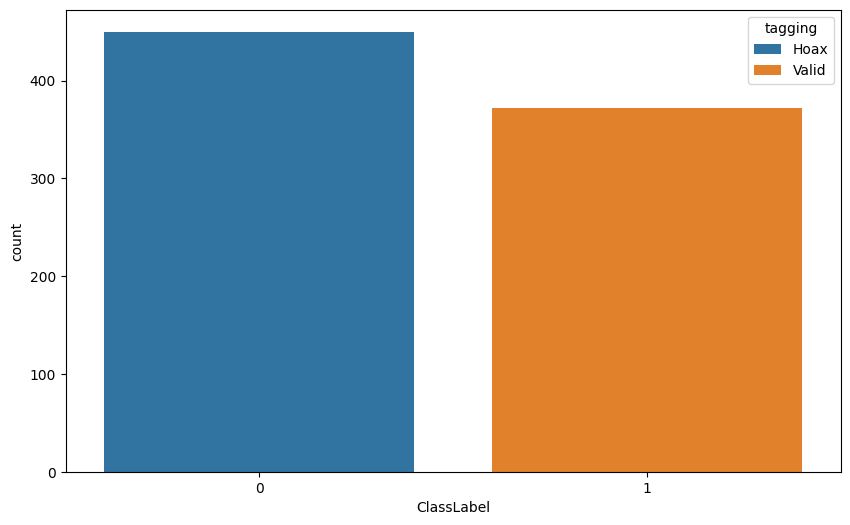

In [ ]:
df['ClassLabel'].value_counts()
# Visualize the distribution of class labels
plt.figure(figsize=(10, 6))
sns.countplot(x='ClassLabel', hue='tagging' ,data=df)

## TRAIN TEST VALIDATION SPLIT

In [ ]:
ds = ds['train'].train_test_split(test_size=0.4, seed = 21, stratify_by_column="ClassLabel")
ds_test = ds['test'].train_test_split(test_size=0.5, seed=21, stratify_by_column="ClassLabel")
dataset = DatasetDict({
    'train': ds['train'],
    'test': ds_test['test'],
    'valid': ds_test['train']})
# see structure
dataset

DatasetDict({
    train: Dataset({
        features: ['berita', 'tagging', 'berita_id', 'ClassLabel'],
        num_rows: 493
    })
    test: Dataset({
        features: ['berita', 'tagging', 'berita_id', 'ClassLabel'],
        num_rows: 165
    })
    valid: Dataset({
        features: ['berita', 'tagging', 'berita_id', 'ClassLabel'],
        num_rows: 164
    })
})

## SAVE TRAIN TEST AND VALIDATION INTO GDRIVE

In [ ]:
df_train = dataset['train'].to_pandas()
df_test = dataset['test'].to_pandas()
df_valid = dataset['valid'].to_pandas()

In [ ]:
df_train.to_csv(parent_folder+'hoaxnews_train.csv', index=False)
df_test.to_csv(parent_folder+'hoaxnews_test.csv', index=False)
df_valid.to_csv(parent_folder+'hoaxnews_valid.csv', index=False)

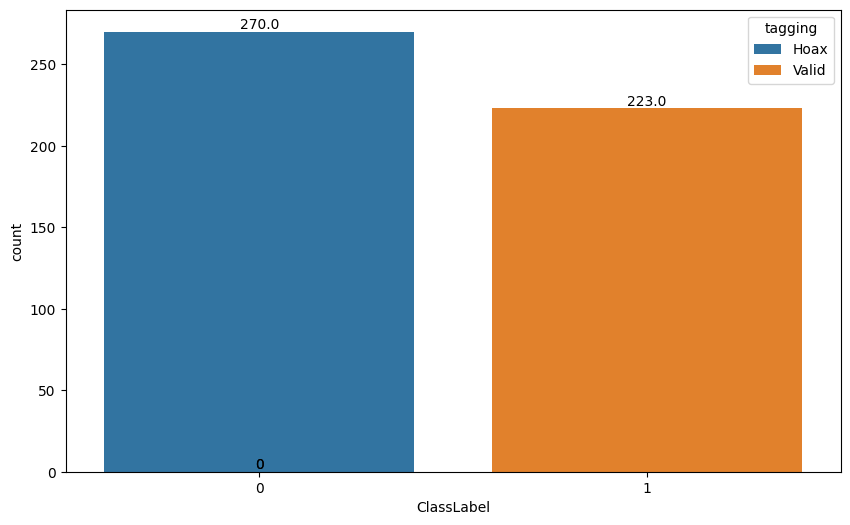

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ClassLabel', hue='tagging' ,data=df_train)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# LOAD THE DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
parent_folder = "/content/drive/MyDrive/project BNSP/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv(parent_folder+'hoaxnews.csv')

In [ ]:
df_train = pd.read_csv(parent_folder+'hoaxnews_train.csv')
df_test = pd.read_csv(parent_folder+'hoaxnews_test.csv')
df_valid = pd.read_csv(parent_folder+'hoaxnews_valid.csv')

In [ ]:
# Convert the DataFrames to Datasets
train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)
valid_dataset = Dataset.from_pandas(df_valid)

# Create the DatasetDict
dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset,
    'valid': valid_dataset
})

# Verify the structure
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['berita', 'tagging', 'berita_id', 'ClassLabel'],
        num_rows: 493
    })
    test: Dataset({
        features: ['berita', 'tagging', 'berita_id', 'ClassLabel'],
        num_rows: 165
    })
    valid: Dataset({
        features: ['berita', 'tagging', 'berita_id', 'ClassLabel'],
        num_rows: 164
    })
})


## DATA PREPROCESSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   berita      822 non-null    object
 1   tagging     822 non-null    object
 2   berita_id   795 non-null    object
 3   ClassLabel  822 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.8+ KB


## MISSING VALUE


In [ ]:
df.isnull().sum()

berita         0
tagging        0
berita_id     27
ClassLabel     0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]['berita_id']

17     NaN
49     NaN
141    NaN
158    NaN
197    NaN
201    NaN
283    NaN
310    NaN
338    NaN
364    NaN
376    NaN
406    NaN
411    NaN
479    NaN
497    NaN
572    NaN
602    NaN
619    NaN
642    NaN
645    NaN
711    NaN
720    NaN
731    NaN
772    NaN
775    NaN
787    NaN
795    NaN
Name: berita_id, dtype: object

In [ ]:
import re
def remove_special_character(text):
    # Mengganti special characters dan punctuation dengan string kosong
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

In [ ]:
remove_special_character(df['berita'][17])

'The Pokemon Go game is currently endemic craze and increasingly popular with netizens throughout Indonesia and the world A question was asked to our editor Is playing Pokemon Go Game according to Islam halal or haram As an introduction Pokemon Go is an augmentedrealitybased game developed by the Pokemon Company in collaboration with Niantic and Nintendo How to play someone uses a smartphone both Android and iOS to hunt Pokemon monsters With Android or iOS smartphone devices users can hunt Pokemon monsters in the real world for example in rivers mountains streets offices markets supermarkets lakes and other places So Pokemon monsters seem to exist and hide in the real world that can be seen through your cellphone screen Users are also busy hunting Pokemon monsters around them In fact some of them deliberately venture here and there to places where there are Pokemon monsters such as Pikachu Bulbasaur Charmander Squirtle and so on game pokemon go according to islam Suddenly many children

In [ ]:
def trim_text_to_words(text, num_words):
    """
    Trims a string to a specified number of words.

    :param text: The input string.
    :param num_words: The maximum number of words to keep.
    :return: The trimmed string.
    """
    words = text.split()
    if len(words) > num_words:
        return ' '.join(words[:num_words])
    return text

# Example usage: trim the text at index 17 in the 'berita' column to 50 words
trimmed_text = trim_text_to_words(str(remove_special_character(df['berita'][17])), 500)
trimmed_text

'The Pokemon Go game is currently endemic craze and increasingly popular with netizens throughout Indonesia and the world A question was asked to our editor Is playing Pokemon Go Game according to Islam halal or haram As an introduction Pokemon Go is an augmentedrealitybased game developed by the Pokemon Company in collaboration with Niantic and Nintendo How to play someone uses a smartphone both Android and iOS to hunt Pokemon monsters With Android or iOS smartphone devices users can hunt Pokemon monsters in the real world for example in rivers mountains streets offices markets supermarkets lakes and other places So Pokemon monsters seem to exist and hide in the real world that can be seen through your cellphone screen Users are also busy hunting Pokemon monsters around them In fact some of them deliberately venture here and there to places where there are Pokemon monsters such as Pikachu Bulbasaur Charmander Squirtle and so on game pokemon go according to islam Suddenly many children

In [ ]:
def clean_and_trim_text(text):
    """
    Applies special character removal and trimming to a text string.

    if pd.isnull(text): # Handle NaN values if any
        return text
    """
    cleaned_text = remove_special_character(str(text)) # Ensure text is string
    trimmed_text = trim_text_to_words(cleaned_text, 500) # Apply trimming
    return trimmed_text


In [ ]:
# Translate the non-null 'berita' values in the rows with any nulls
df.loc[df.isnull().any(axis=1), 'berita'] = df.loc[df.isnull().any(axis=1), 'berita'].apply(lambda x: clean_and_trim_text(x))

In [ ]:
# Translate the non-null 'berita' values in the rows with any nulls
df.loc[df.isnull().any(axis=1), 'berita_id'] = df.loc[df.isnull().any(axis=1), 'berita'].apply(lambda x: translate_text(x, 'id'))

# Now the 'berita_id' for those rows should be translated
print(df[df.isnull().any(axis=1)][['berita', 'berita_id']])

Empty DataFrame
Columns: [berita, berita_id]
Index: []


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   berita      822 non-null    object
 1   tagging     822 non-null    object
 2   berita_id   822 non-null    object
 3   ClassLabel  822 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.8+ KB


In [ ]:
translate_text(trimmed_text, 'id')

'Permainan Pokemon Go saat ini adalah kegemaran endemik dan semakin populer dengan netizen di seluruh Indonesia dan dunia pertanyaan yang diajukan kepada editor kami adalah bermain game Pokemon Go menurut Islam Halal atau Haram sebagai PENDAHULUAN Pokemon GO adalah pokemon yang dikembangkan oleh Pokemon dan Pokemon yang digunakan untuk menggunakan niantic dan nintendan.iOS smartphone devices users can hunt Pokemon monsters in the real world for example in rivers mountains streets offices markets supermarkets lakes and other places So Pokemon monsters seem to exist and hide in the real world that can be seen through your cellphone screen Users are also busy hunting Pokemon monsters around them In fact some of them deliberately venture here and there to places where there are Pokemon monsters such as Pikachu Bulbasaur CharmanderSquirtle and so on game pokemon go according to islam Suddenly many children teenagers and adults are addicted to the Pokemon Go game and are pacing around busy p

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   berita      493 non-null    object
 1   tagging     493 non-null    object
 2   berita_id   478 non-null    object
 3   ClassLabel  493 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.5+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   berita      165 non-null    object
 1   tagging     165 non-null    object
 2   berita_id   158 non-null    object
 3   ClassLabel  165 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.3+ KB


In [ ]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   berita      164 non-null    object
 1   tagging     164 non-null    object
 2   berita_id   159 non-null    object
 3   ClassLabel  164 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.3+ KB


In [ ]:
# Clean and Trim
df_train.loc[df_train.isnull().any(axis=1), 'berita'] = df_train.loc[df_train.isnull().any(axis=1), 'berita'].apply(lambda x: clean_and_trim_text(x))
df_test.loc[df_test.isnull().any(axis=1), 'berita'] = df_test.loc[df_test.isnull().any(axis=1), 'berita'].apply(lambda x: clean_and_trim_text(x))
df_valid.loc[df_valid.isnull().any(axis=1), 'berita'] = df_valid.loc[df_valid.isnull().any(axis=1), 'berita'].apply(lambda x: clean_and_trim_text(x))
# Translate the non-null 'berita' values in the rows with any nulls
df_train.loc[df_train.isnull().any(axis=1), 'berita_id'] = df_train.loc[df_train.isnull().any(axis=1), 'berita'].apply(lambda x: translate_text(x, 'id'))
df_test.loc[df_test.isnull().any(axis=1), 'berita_id'] = df_test.loc[df_test.isnull().any(axis=1), 'berita'].apply(lambda x: translate_text(x, 'id'))
df_valid.loc[df_valid.isnull().any(axis=1), 'berita_id'] = df_valid.loc[df_valid.isnull().any(axis=1), 'berita'].apply(lambda x: translate_text(x, 'id'))

In [ ]:
df_train.head()

berita tagging  \
0  Catfish is one type of fish that is rich in an...    Hoax   
1  Rumors circulated that there had been a riot a...    Hoax   
2  Recently, quite horrendous news circulated reg...   Valid   
3  This one news may be very useful for consumers...    Hoax   
4  Catfish is one of the most popular dishes, esp...   Valid   

                                           berita_id  ClassLabel  
0  Lele adalah salah satu jenis ikan yang kaya ak...           0  
1  Rumor beredar bahwa telah terjadi kerusuhan di...           0  
2  Baru -baru ini, berita yang cukup mengerikan b...           1  
3  Berita yang satu ini mungkin sangat berguna ba...           0  
4  Catfish adalah salah satu hidangan paling popu...           1

In [ ]:
df_test.head()

berita tagging  \
0  The riot took place at the Brimob Mako Detenti...    Hoax   
1  The Jabodetabek Reog Community sent an officia...   Valid   
2  Here's a photo of the easily curved iPhone 6 c...    Hoax   
3  There is a bad habit of netizens that until no...   Valid   
4  The Head of the Public Information Bureau of t...   Valid   

                                           berita_id  ClassLabel  
0  Kerusuhan itu terjadi di Pusat Penahanan Brimo...           0  
1  Komunitas Reog Jabodetabek mengirim surat resm...           1  
2  Berikut adalah foto iPhone 6 yang mudah meleng...           0  
3  Ada kebiasaan buruk netizen yang sampai sekara...           1  
4  Kepala Biro Informasi Publik Divisi Hubungan M...           1

## DUPLICATE VALUE


In [ ]:
df.duplicated().sum()

np.int64(216)

In [ ]:
duplicates = df.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 216


In [ ]:
df[duplicates]

berita tagging  \
22   Needlestick First Aid For Stroke Sufferers? Su...    Hoax   
50   It is not known with certainty whether the pac...    Hoax   
58   The Head of the Legal, Communication and Publi...    Hoax   
77   Lately we often get broadcast information via ...    Hoax   
78   JAKARTA, Spokesperson for the Ministry of Fore...    Hoax   
..                                                 ...     ...   
813  Already know the dangers of catfish for health...    Hoax   
815  The Kanisius College Alumni Association (PAKKJ...    Hoax   
818  Regarding the finding of candy snacks containi...    Hoax   
819  The Muslim community was shocked by the news a...    Hoax   
821  The issue of the iPhone 6 Plus which users cla...    Hoax   

                                             berita_id  ClassLabel  
22   Perlu pertolongan pertama yang perlu untuk pen...           0  
50   Tidak diketahui dengan pasti apakah dot yang b...           0  
58   Kepala Biro Informasi Hukum, Komunikasi dan Pu...           0  
77   Akhir -akhir ini kita sering mendapatkan infor...           0  
78   Jakarta, juru bicara Kementerian Luar Negeri A...           0  
..                                                 ...         ...  
813  Sudah tahu bahaya ikan lele untuk kesehatan?At...           0  
815  Asosiasi Alumni Kanisius College (PakKJ) menge...           0  
818  Mengenai temuan camilan permen yang mengandung...           0  
819  Komunitas Muslim terkejut dengan berita tentan...           0  
821  Masalah iPhone 6 Plus yang diklaim pengguna mu...           0  

[216 rows x 4 columns]

In [ ]:
# Convert the DataFrames to Datasets
train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)
valid_dataset = Dataset.from_pandas(df_valid)

# Create the DatasetDict
dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset,
    'valid': valid_dataset
})

# Verify the structure
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['berita', 'tagging', 'berita_id', 'ClassLabel'],
        num_rows: 493
    })
    test: Dataset({
        features: ['berita', 'tagging', 'berita_id', 'ClassLabel'],
        num_rows: 165
    })
    valid: Dataset({
        features: ['berita', 'tagging', 'berita_id', 'ClassLabel'],
        num_rows: 164
    })
})


### CEK & REMOVE (IF ANY) EMOTICON

In [ ]:
pip install emoji ftfy demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Extract emoji
import emoji
import demoji
import ftfy

In [ ]:
# Dictionary emotikon
emoticons_dict = {
    "😃": "senang",
    "😊": "senang",
    "😂": "tertawa",
    "😢": "menangis",
    "😡": "marah",
    "😍": "cinta",
    "😎": "keren",
    "😞": "sedih",
    "😄": "tertawa",
    "😉": "menyeringai",
    "😭": "menangis keras",
    "😜": "menggoda",
    "😒": "tidak senang",
    "😔": "tertekan",
    "😇": "baik hati",
    "😋": "lezat",
    "😱": "ketakutan",
    "😠": "marah",
    "😴": "mengantuk",
    "😅": "keringat dingin",
    "😆": "tertawa terbahak",
    "😘": "cium",
    "😗": "cium",
    "😙": "cium",
    "😚": "cium",
    "😐": "datar",
    "😑": "tidak senang",
    "😶": "tidak bicara",
    "🙄": "putar mata",
    "😏": "sinis",
    "😣": "frustrasi",
    "😥": "lega",
    "😮": "terkejut",
    "😯": "terkejut",
    "😪": "mengantuk",
    "😫": "lelah",
    "😴": "tidur",
    "😌": "lega",
    "😛": "menjulurkan lidah",
    "😜": "menjulurkan lidah",
    "😝": "menjulurkan lidah",
    "😒": "tidak senang",
    "😓": "keringat dingin",
    "😔": "sedih",
    "😕": "bingung",
    "😲": "terkejut",
    "😷": "sakit",
    "😺": "kucing senang",
    "😸": "kucing senang",
    "😹": "kucing tertawa",
    "😻": "kucing cinta",
    "😼": "kucing sinis",
    "😽": "kucing cium",
    "🙀": "kucing terkejut",
    "😿": "kucing sedih",
    "😾": "kucing marah",
    "👍": "jempol",
    "👎": "jempol turun",
    "👌": "ok",
    "✌": "damai",
    "👋": "halo",
    "👏": "tepuk tangan",
    "👐": "tangan terbuka",
    "🙏": "berdoa",
    "👊": "tinju",
    "✊": "angkat tinju",
    "🤛": "tinju kiri",
    "🤜": "tinju kanan",
    "🤞": "menyilangkan jari",
    "✋": "tangan terbuka",
    "🤚": "tangan terbuka",
    "🖐": "tangan terbuka",
    "🖖": "salute vulcan"
}

# cek emotikon dalam teks
def count_emotikon(text, emoticons_dict):
    text = ftfy.fix_text(text)
    emojis = emoji.emoji_list(text)
    if emojis:
      for j in emojis:
        list_of_emoji.append(j['emoji'])
    return len(emojis)

# cek emotikon dalam teks
def extract_emotikon(text):
    text = ftfy.fix_text(text)
    emojis = emoji.emoji_list(text)
    emojis_str = ""
    if emojis:
      return " ".join([i['emoji'] for i in emojis])
    else:
      return ""

list_of_emoji = []
df_train["count_emoji"] = df_train["berita_id"].apply(lambda x: count_emotikon(x, emoticons_dict))

In [ ]:
df_train.loc[df_train['count_emoji'] > 0, 'berita_id']

Series([], Name: berita_id, dtype: object)

### CEK & REMOVE (IF ANY) URL

In [ ]:
# Pola regex untuk URL
url_pattern = r'https?://\S+|pic.twitter.com/\S+'

# menampilkan baris yang memiliki url
#rows_with_url = df_train[df_train["berita_id"].str.contains(url_pattern, regex=True)]

# ekstraksi url dari tweet
def extract_url(teks):
    urls = re.findall(url_pattern, teks)
    return ', '.join(urls) if urls else None

# add kolom url dalam tabel
#rows_with_url['urls'] = rows_with_url['tweet'].apply(extract_url)
df_train["urls"] = df_train["berita_id"].apply(extract_url)
df_test["urls"] = df_test["berita_id"].apply(extract_url)
df_valid["urls"] = df_valid["berita_id"].apply(extract_url)

# sanity check
print(df_train.loc[df_train["urls"].notnull(), ["berita_id", "urls"]])

print(df_test.loc[df_train["urls"].notnull(), ["berita_id", "urls"]])

print(df_valid.loc[df_train["urls"].notnull(), ["berita_id", "urls"]])

                                             berita_id  \
363  Informasi yang beredar di dunia media sosial t...   
401  Akhir -akhir ini dunia virtual telah membuat k...   

                                                  urls  
363  http://www.merriam-webster.com/dictionary/bris...  
401   http://www.amazon.com/dp/b0152bo0f2?psc=1.Namun,  
Empty DataFrame
Columns: [berita_id, urls]
Index: []
Empty DataFrame
Columns: [berita_id, urls]
Index: []


In [ ]:
# hapus url
df_train['berita_id_clean'] = df_train['berita_id'].str.replace(r'https?://\S+|pic.twitter.com/\S+', '', regex=True)

In [ ]:
df_train.iloc[363]

berita             Information circulating in the world of social...
tagging                                                        Valid
berita_id          Informasi yang beredar di dunia media sosial t...
ClassLabel                                                         1
count_emoji                                                        0
urls               http://www.merriam-webster.com/dictionary/bris...
berita_id_clean    Informasi yang beredar di dunia media sosial t...
Name: 363, dtype: object

### CEK AND REMOVE @, PUNCTUATION, HASHTAG IF ANY

In [ ]:
# Pola regex untuk username
username_pattern = r'@\w+'

# ekstrak username dari teks
def extract_username(teks):
    usernames = re.findall(username_pattern, teks)
    return ', '.join(usernames) if usernames else None

# add kolom 'usernames' ke DataFrame
df_train['usernames'] = df_train["berita_id"].apply(extract_username)
df_test['usernames'] = df_test["berita_id"].apply(extract_username)
df_valid['usernames'] = df_valid["berita_id"].apply(extract_username)

# sanity check
print(df_train.loc[df_train["usernames"].notnull(), ["berita_id", "usernames"]])
print(df_test.loc[df_test["usernames"].notnull(), ["berita_id", "usernames"]])
print(df_valid.loc[df_valid["usernames"].notnull(), ["berita_id", "usernames"]])

                                             berita_id  \
26   Alam semesta virtual dikejutkan oleh tindakan ...   
54   Pokemon Go Game Fever yang baru-baru ini terja...   
56   Bitungnews - Budaya Reog Ponorogo adalah salah...   
82   Warga Surabaya dapat menghela nafas lega setel...   
92   Rumor beredar di dunia media sosial, bahwa ada...   
132  Tindakan Walk Out oleh alumni Kanisius College...   
150  Jika Malaysia ingin mengendalikan Reog Ponorog...   
155  Pemerintah telah mengancam akan menutup media ...   
192  Alam semesta virtual dikejutkan oleh tindakan ...   
244  Dunia virtual dimeriahkan dengan undangan untu...   
303  Pusat Penahanan Brimob Mako, Kelapa Dua, Depok...   
396  Tindakan Walk Out oleh alumni Kanisius College...   
454  Bitungnews - Budaya Reog Ponorogo adalah salah...   
481  Produk terbaru Apple, iPhone 6 Plus, sering di...   

                                             usernames  
26                           @wollessunda, @conan_back  
54            @

In [ ]:
# Pola regex untuk punctuation
punctuation_pattern = r'[^\w\s@]'

# ekstraksi punctuation
def extract_punctuation(teks):
    punctuations = re.findall(punctuation_pattern, teks)
    return ', '.join(punctuations) if punctuations else None

# add kolom 'punctuation' ke DataFrame
df_train['punctuation'] = df_train["berita_id"].apply(extract_punctuation)
df_test['punctuation'] = df_test["berita_id"].apply(extract_punctuation)
df_valid['punctuation'] = df_valid["berita_id"].apply(extract_punctuation)

# sanity check
print(df_train.loc[df_train["punctuation"].notnull(), ["berita_id", "punctuation"]])
print(df_test.loc[df_test["punctuation"].notnull(), ["berita_id", "punctuation"]])
print(df_valid.loc[df_valid["punctuation"].notnull(), ["berita_id", "punctuation"]])

                                             berita_id  \
0    Lele adalah salah satu jenis ikan yang kaya ak...   
1    Rumor beredar bahwa telah terjadi kerusuhan di...   
2    Baru -baru ini, berita yang cukup mengerikan b...   
3    Berita yang satu ini mungkin sangat berguna ba...   
4    Catfish adalah salah satu hidangan paling popu...   
..                                                 ...   
488  Pemerintah Kota Surabaya terus menyerang dot y...   
489  Siapa yang tidak tahu ikan lele, ikan ini adal...   
490  Bekasi, kebangkitan permen dot yang diduga men...   
491  Dari catatan Yayasan Indonesia, stroke adalah ...   
492  Untuk melakukan tindakan untuk membela Islam d...   

                                           punctuation  
0    ., ., ,, ., ?, :, ), ., ,, ., ,, ., ,, ., -, ....  
1    ,, ,, ,, ,, (, /, /, ), ., ,, ,, -, -, ', -, ....  
2    -, ,, ., ., ., ,, -, ,, ., ,, ., :, ", ,, ,, ,...  
3    ., ,, ,, ., ,, ., ., ,, -, ., ,, -, ', ', ,, ....  
4    ,, ., ,, ., ,

In [ ]:
# Pola regex untuk hashtag
hashtag_pattern = r'#\w+'

# ekstrak hashtag dari teks
def extract_hashtag(teks):
    hashtags = re.findall(hashtag_pattern, teks)
    return ', '.join(hashtags) if hashtags else None

# add kolom 'hashtag' ke DataFrame
df_train['hashtag'] = df_train["berita_id"].apply(extract_punctuation)
df_test['hashtag'] = df_test["berita_id"].apply(extract_punctuation)
df_valid['hashtag'] = df_valid["berita_id"].apply(extract_punctuation)

# sanity check
print(df_train.loc[df_train["hashtag"].notnull(), ["berita_id", "hashtag"]])
print(df_test.loc[df_test["hashtag"].notnull(), ["berita_id", "hashtag"]])
print(df_valid.loc[df_valid["hashtag"].notnull(), ["berita_id", "hashtag"]])

                                             berita_id  \
0    Lele adalah salah satu jenis ikan yang kaya ak...   
1    Rumor beredar bahwa telah terjadi kerusuhan di...   
2    Baru -baru ini, berita yang cukup mengerikan b...   
3    Berita yang satu ini mungkin sangat berguna ba...   
4    Catfish adalah salah satu hidangan paling popu...   
..                                                 ...   
488  Pemerintah Kota Surabaya terus menyerang dot y...   
489  Siapa yang tidak tahu ikan lele, ikan ini adal...   
490  Bekasi, kebangkitan permen dot yang diduga men...   
491  Dari catatan Yayasan Indonesia, stroke adalah ...   
492  Untuk melakukan tindakan untuk membela Islam d...   

                                               hashtag  
0    ., ., ,, ., ?, :, ), ., ,, ., ,, ., ,, ., -, ....  
1    ,, ,, ,, ,, (, /, /, ), ., ,, ,, -, -, ', -, ....  
2    -, ,, ., ., ., ,, -, ,, ., ,, ., :, ", ,, ,, ,...  
3    ., ,, ,, ., ,, ., ., ,, -, ., ,, -, ', ', ,, ....  
4    ,, ., ,, ., ,

In [ ]:
def remove_special_character(text):
    # Mengganti special characters dan punctuation dengan string kosong
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

In [ ]:
# Menghapus special characters dari kolom 'tweet'
df_train['berita_id_clean'] = df_train['berita_id_clean'].apply(remove_special_character)
df_test['berita_id_clean'] = df_test['berita_id'].apply(remove_special_character)
df_valid['berita_id_clean'] = df_valid['berita_id'].apply(remove_special_character)

### CEK NUMERIK AND REMOVE IF NEEDED

In [ ]:
# Pola regex untuk numerik
numeric_pattern = r'\d+'

# ekstraksi numerik
def extract_numeric(teks):
    numerics = re.findall(numeric_pattern, teks)
    return ', '.join(numerics) if numerics else None

# add kolom 'numeric' ke DataFrame
df_train['numeric'] = df_train["berita_id"].apply(extract_numeric)
df_test['numeric'] = df_test["berita_id"].apply(extract_numeric)
df_valid['numeric'] = df_valid["berita_id"].apply(extract_numeric)

# sanity check
print(df_train.loc[df_train["numeric"].notnull(), ["berita_id", "numeric"]])
print(df_test.loc[df_test["numeric"].notnull(), ["berita_id", "numeric"]])
print(df_valid.loc[df_valid["numeric"].notnull(), ["berita_id", "numeric"]])

                                             berita_id  \
0    Lele adalah salah satu jenis ikan yang kaya ak...   
1    Rumor beredar bahwa telah terjadi kerusuhan di...   
2    Baru -baru ini, berita yang cukup mengerikan b...   
3    Berita yang satu ini mungkin sangat berguna ba...   
4    Catfish adalah salah satu hidangan paling popu...   
..                                                 ...   
488  Pemerintah Kota Surabaya terus menyerang dot y...   
489  Siapa yang tidak tahu ikan lele, ikan ini adal...   
490  Bekasi, kebangkitan permen dot yang diduga men...   
491  Dari catatan Yayasan Indonesia, stroke adalah ...   
492  Untuk melakukan tindakan untuk membela Islam d...   

                                               numeric  
0                                        3, 7, 3, 3000  
1                                         11, 10, 2017  
2                                    1000, 5, 10, 2016  
3             6, 5, 5, 6, 6, 6, 4, 6, 6, 6, 5, 5, 6, 6  
4    3, 3, 6, 2, 3

### cek DOUBLE SPACE

In [ ]:
# Pola regex untuk spasi ganda
double_space_pattern = r'\s\s+'

# ekstraksi double space
def extract_double_space(teks):
    double_spaces = re.findall(double_space_pattern, teks)
    return ', '.join(double_spaces) if double_spaces else None

# add kolom 'doublespaces' ke DataFrame
df_train['doublespace'] = df_train["berita_id"].apply(extract_double_space)
df_test['doublespace'] = df_test["berita_id"].apply(extract_double_space)
df_valid['doublespace'] = df_valid["berita_id"].apply(extract_double_space)

# sanity check
print(df_train.loc[df_train["doublespace"].notnull(), ["berita_id", "doublespace"]])
print(df_test.loc[df_test["doublespace"].notnull(), ["berita_id", "doublespace"]])
print(df_valid.loc[df_valid["doublespace"].notnull(), ["berita_id", "doublespace"]])

Empty DataFrame
Columns: [berita_id, doublespace]
Index: []
Empty DataFrame
Columns: [berita_id, doublespace]
Index: []
Empty DataFrame
Columns: [berita_id, doublespace]
Index: []


### CONVERT TO LOWERCASE

In [ ]:
# Mengubah isi kolom tweet_non_double_space menjadi lowercase di X_train
df_train['berita_id_lc'] = df_train['berita_id_clean'].str.lower()
df_test['berita_id_lc'] = df_test['berita_id_clean'].str.lower()
df_valid['berita_id_lc'] = df_valid['berita_id_clean'].str.lower()

### CEK STOPWORDS

In [ ]:
import nltk
from collections import Counter
from nltk.corpus import stopwords

In [ ]:
# download stopword
nltk.download('stopwords')

# Stopwords indonesia
stopwords_indonesia = set(stopwords.words('indonesian'))

# ekstrak stopwords
def extract_stopwords(teks):
    words = teks.split()
    stopwords_in_text = [word for word in words if word.lower() in stopwords_indonesia]
    return ', '.join(stopwords_in_text) if stopwords_in_text else None

# cek teks dan tambahkan kolom stopwords
df_train['stopwords'] = df_train['berita_id'].apply(extract_stopwords)
df_test['stopwords'] = df_test['berita_id'].apply(extract_stopwords)
df_valid['stopwords'] = df_valid['berita_id'].apply(extract_stopwords)

# sanity check
print(df_train.loc[df_train["stopwords"].notnull(), ["berita_id", "stopwords"]])
print(df_test.loc[df_test["stopwords"].notnull(), ["berita_id", "stopwords"]])
print(df_valid.loc[df_valid["stopwords"].notnull(), ["berita_id", "stopwords"]])

                                             berita_id  \
0    Lele adalah salah satu jenis ikan yang kaya ak...   
1    Rumor beredar bahwa telah terjadi kerusuhan di...   
2    Baru -baru ini, berita yang cukup mengerikan b...   
3    Berita yang satu ini mungkin sangat berguna ba...   
4    Catfish adalah salah satu hidangan paling popu...   
..                                                 ...   
488  Pemerintah Kota Surabaya terus menyerang dot y...   
489  Siapa yang tidak tahu ikan lele, ikan ini adal...   
490  Bekasi, kebangkitan permen dot yang diduga men...   
491  Dari catatan Yayasan Indonesia, stroke adalah ...   
492  Untuk melakukan tindakan untuk membela Islam d...   

                                             stopwords  
0    adalah, satu, yang, akan, adalah, satu, bagi, ...  
1    bahwa, telah, terjadi, di, pada, hari, yang, s...  
2    Baru, yang, cukup, mengenai, dikatakan, menggu...  
3    yang, satu, ini, mungkin, sangat, bagi, yang, ...  
4    adalah, satu,

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# pengecualian kata tidak dan semakin pada stopwords
stopwords_indonesia = [word for word in stopwords_indonesia if word.lower() not in ['tidak', 'semakin']]

# hapus stopwords dari teks
def remove_stopwords(text):
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in stopwords_indonesia]
    return ' '.join(cleaned_words)

In [ ]:
# hapus stopwords dari teks
df_train['berita_id_stopwords'] = df_train['berita_id_lc'].apply(remove_stopwords)
df_test['berita_id_stopwords'] = df_test['berita_id_lc'].apply(remove_stopwords)
df_valid['berita_id_stopwords'] = df_valid['berita_id_lc'].apply(remove_stopwords)

### STEMMING

In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.tokenize import word_tokenize

# Donwload punkt
nltk.download('punkt')

# Definisi sastrawi untuk stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import nltk
#nltk.download('punkt_tab')
nltk.download('punkt')

# stemming teks dengan Sastrawi
def stemming_indonesian(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# stemming teks dengan Sastrawi
df_train['berita_id_stemming'] = df_train['berita_id_lc'].apply(stemming_indonesian)
df_test['berita_id_stemming'] = df_test['berita_id_lc'].apply(stemming_indonesian)
df_valid['berita_id_stemming'] = df_valid['berita_id_lc'].apply(stemming_indonesian)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### TOKENIZE

In [ ]:
import nltk
nltk.download('punkt')

# word tokenization
def tokenize_text(text):
    return nltk.word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# add kolom baru 'tweet_tokenize' ke X_train
df_train['berita_id_tokenize'] = df_train['berita_id_stemming'].apply(tokenize_text)
df_test['berita_id_tokenize'] = df_test['berita_id_stemming'].apply(tokenize_text)
df_valid['berita_id_tokenize'] = df_valid['berita_id_stemming'].apply(tokenize_text)

In [ ]:
df_train.head()

berita tagging  \
0  Catfish is one type of fish that is rich in an...    Hoax   
1  Rumors circulated that there had been a riot a...    Hoax   
2  Recently, quite horrendous news circulated reg...   Valid   
3  This one news may be very useful for consumers...    Hoax   
4  Catfish is one of the most popular dishes, esp...   Valid   

                                           berita_id  ClassLabel  count_emoji  \
0  Lele adalah salah satu jenis ikan yang kaya ak...           0            0   
1  Rumor beredar bahwa telah terjadi kerusuhan di...           0            0   
2  Baru -baru ini, berita yang cukup mengerikan b...           1            0   
3  Berita yang satu ini mungkin sangat berguna ba...           0            0   
4  Catfish adalah salah satu hidangan paling popu...           1            0   

   urls                                    berita_id_clean usernames  \
0  None  Lele adalah salah satu jenis ikan yang kaya ak...      None   
1  None  Rumor beredar bahwa telah terjadi kerusuhan di...      None   
2  None  Baru baru ini berita yang cukup mengerikan ber...      None   
3  None  Berita yang satu ini mungkin sangat berguna ba...      None   
4  None  Catfish adalah salah satu hidangan paling popu...      None   

                                         punctuation  \
0  ., ., ,, ., ?, :, ), ., ,, ., ,, ., ,, ., -, ....   
1  ,, ,, ,, ,, (, /, /, ), ., ,, ,, -, -, ', -, ....   
2  -, ,, ., ., ., ,, -, ,, ., ,, ., :, ", ,, ,, ,...   
3  ., ,, ,, ., ,, ., ., ,, -, ., ,, -, ', ', ,, ....   
4  ,, ., ,, ., ,, ., ., ,, ,, -, ., ,, -, ., -, (...   

                                             hashtag  \
0  ., ., ,, ., ?, :, ), ., ,, ., ,, ., ,, ., -, ....   
1  ,, ,, ,, ,, (, /, /, ), ., ,, ,, -, -, ', -, ....   
2  -, ,, ., ., ., ,, -, ,, ., ,, ., :, ", ,, ,, ,...   
3  ., ,, ,, ., ,, ., ., ,, -, ., ,, -, ', ', ,, ....   
4  ,, ., ,, ., ,, ., ., ,, ,, -, ., ,, -, ., -, (...   

                                             numeric doublespace  \
0                                      3, 7, 3, 3000        None   
1                                       11, 10, 2017        None   
2                                  1000, 5, 10, 2016        None   
3           6, 5, 5, 6, 6, 6, 4, 6, 6, 6, 5, 5, 6, 6        None   
4  3, 3, 6, 2, 3, 5, 3, 3, 53, 3, 63, 28, 34, 12,...        None   

                                           stopwords  \
0  adalah, satu, yang, akan, adalah, satu, bagi, ...   
1  bahwa, telah, terjadi, di, pada, hari, yang, s...   
2  Baru, yang, cukup, mengenai, dikatakan, menggu...   
3  yang, satu, ini, mungkin, sangat, bagi, yang, ...   
4  adalah, satu, paling, terutama, dengan, dan, t...   

                                        berita_id_lc  \
0  lele adalah salah satu jenis ikan yang kaya ak...   
1  rumor beredar bahwa telah terjadi kerusuhan di...   
2  baru baru ini berita yang cukup mengerikan ber...   
3  berita yang satu ini mungkin sangat berguna ba...   
4  catfish adalah salah satu hidangan paling popu...   

                                 berita_id_stopwords  \
0  lele salah jenis ikan kaya protein hewanipecel...   
1  rumor beredar kerusuhan pusat penahanan mako b...   
2  berita mengerikan beredar sikat gigibeberapa p...   
3  berita berguna konsumen berniat membeli iphone...   
4  catfish salah hidangan populer menu pecel catf...   

                                  berita_id_stemming  \
0  lele adalah salah satu jenis ikan yang kaya ak...   
1  rumor edar bahwa telah jadi rusuh di pusat tah...   
2  baru baru ini berita yang cukup keri edar kena...   
3  berita yang satu ini mungkin sangat guna bagi ...   
4  catfish adalah salah satu hidang paling popule...   

                                  berita_id_tokenize  
0  [lele, adalah, salah, satu, jenis, ikan, yang,...  
1  [rumor, edar, bahwa, telah, jadi, rusuh, di, p...  
2  [baru, baru, ini, berita, yang, cukup, keri, e...  
3  [berita, yang, satu, ini, mungkin, sangat, gun...  
4  [catfish, adalah, salah, satu, h

# SAVE TOKENIZE DATA TO CSV

In [ ]:
df_train.to_csv(parent_folder+'hoaxnews_train_tokenize.csv', index=False)
df_test.to_csv(parent_folder+'hoaxnews_test_tokenize.csv', index=False)
df_valid.to_csv(parent_folder+'hoaxnews_valid_tokenize.csv', index=False)

# EDA

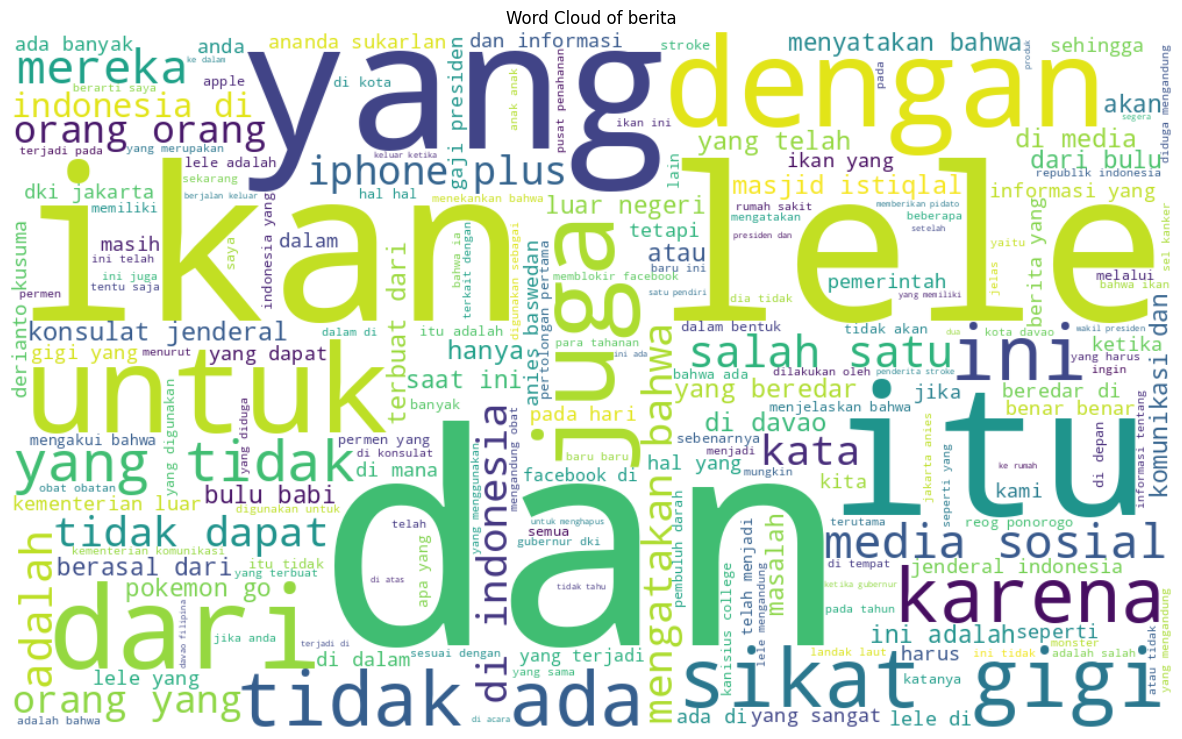

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the reviews into a single string
all_reviews = ' '.join(df_train['berita_id_lc'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of berita')
plt.axis('off')
plt.show()

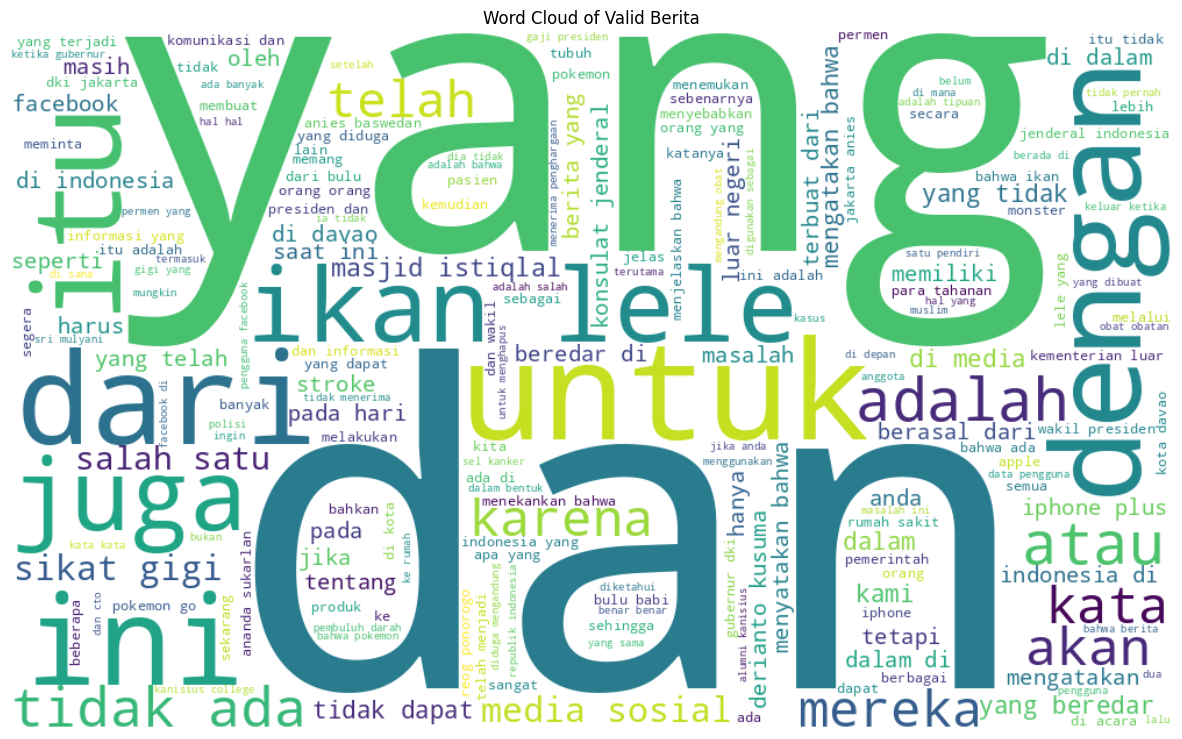

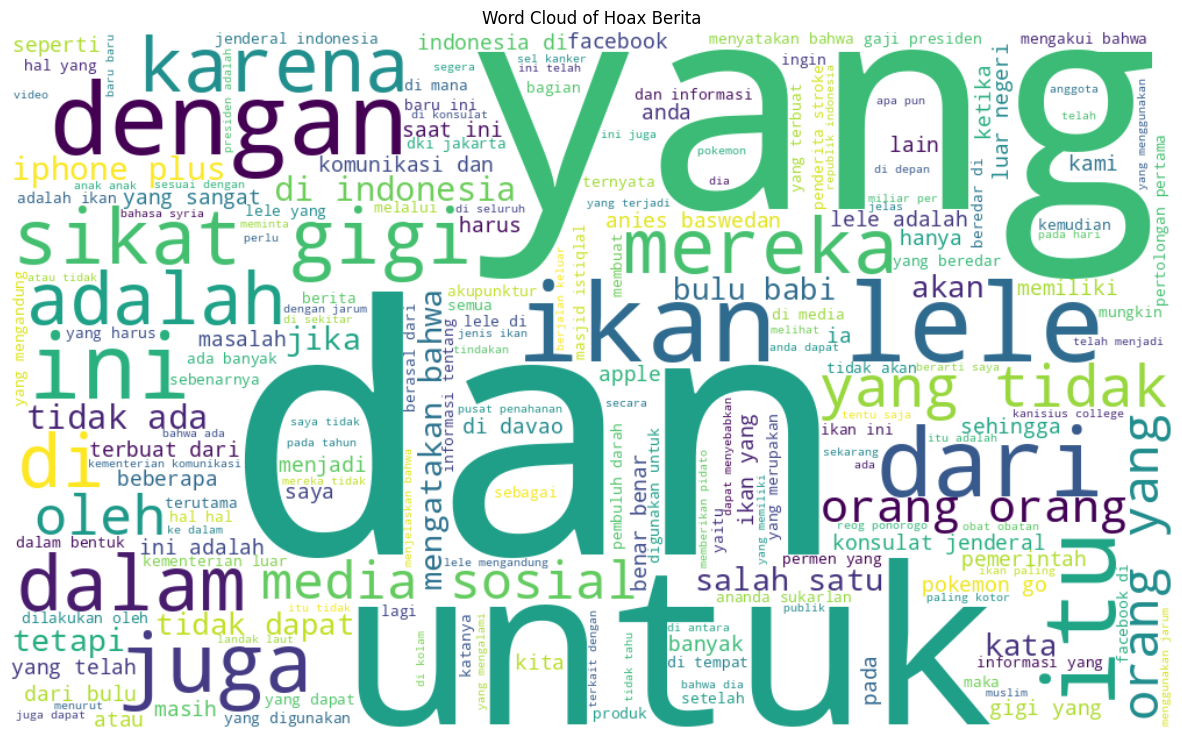

In [ ]:
# Separate data based on 'tagging' column
hoax_text = ' '.join(df_train[df_train['tagging'] == 'Hoax']['berita_id_lc'].dropna())
valid_text = ' '.join(df_train[df_train['tagging'] == 'Valid']['berita_id_lc'].dropna())

# Generate the word cloud for 'valid' tagged data
wordcloud_valid = WordCloud(width=1000, height=600, background_color='white').generate(valid_text)

# Display the word cloud for 'valid' tagged data
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud_valid, interpolation='bilinear')
plt.title('Word Cloud of Valid Berita')
plt.axis('off')
plt.show()

# Generate the word cloud for 'hoax' tagged data
wordcloud_hoax = WordCloud(width=1000, height=600, background_color='white').generate(hoax_text)

# Display the word cloud for 'hoax' tagged data
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud_hoax, interpolation='bilinear')
plt.title('Word Cloud of Hoax Berita')
plt.axis('off')
plt.show()

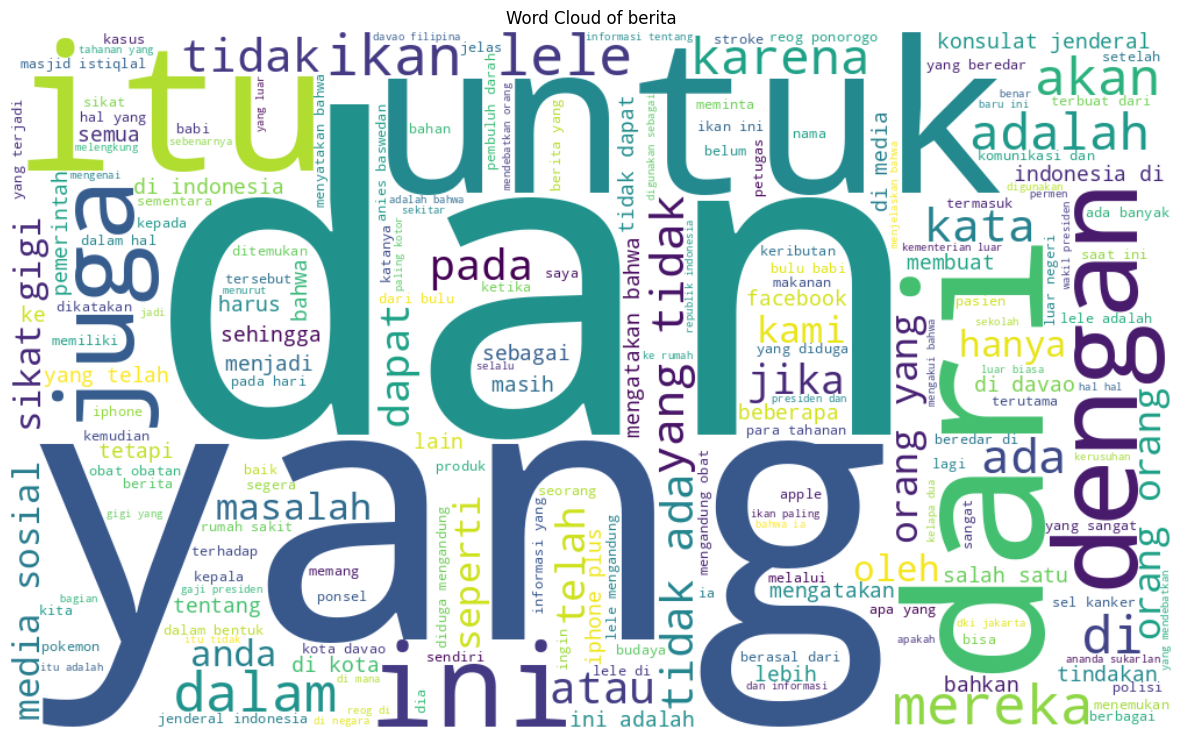

In [ ]:
# Combine all the reviews into a single string
all_reviews = ' '.join(df_test['berita_id_lc'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of berita')
plt.axis('off')
plt.show()

In [ ]:
df_valid.head()

berita tagging  \
0  Some time ago netizens were shocked by the new...   Valid   
1  Catfish is one type of fish that is a favorite...    Hoax   
2  A number of street vendors (PKL) selling candy...    Hoax   
3  Is it true that Facebook will be closed on Apr...   Valid   
4  A chain message about vigilance against toothb...    Hoax   

                                           berita_id  ClassLabel  urls  \
0  Beberapa waktu yang lalu netizen terkejut deng...           1  None   
1  Catfish adalah salah satu jenis ikan yang menj...           0  None   
2  Sejumlah pedagang kaki lima (PKL) yang menjual...           0  None   
3  Benarkah Facebook akan ditutup pada 24 April 2...           1  None   
4  Pesan rantai tentang kewaspadaan terhadap sika...           0  None   

  usernames                                    berita_id_clean  \
0      None  Beberapa waktu yang lalu netizen terkejut deng...   
1      None  Catfish adalah salah satu jenis ikan yang menj...   
2      None  Sejumlah pedagang kaki lima PKL yang menjual c...   
3      None  Benarkah Facebook akan ditutup pada 24 April 2...   
4      None  Pesan rantai tentang kewaspadaan terhadap sika...   

                                         punctuation  \
0  ., ,, ., -, ", ", ,, ", ., ", ,, ,, ., ,, (, )...   
1  ,, ,, ., ,, ., ., ,, ., -, ?, ., -, ,, ,, ., ....   
2  (, ), -, -, ., -, -, ,, (, /, ), ., ,, ,, ", ,...   
3  ?, ., -, ,, ., ., -, ,, ?, ., ,, ,, ,, ,, ", ....   
4  ., ,, ., ., ,, ., ", ,, ", ", ,, ., ., ., ,, "...   

                                             hashtag  \
0  ., ,, ., -, ", ", ,, ", ., ", ,, ,, ., ,, (, )...   
1  ,, ,, ., ,, ., ., ,, ., -, ?, ., -, ,, ,, ., ....   
2  (, ), -, -, ., -, -, ,, (, /, ), ., ,, ,, ", ,...   
3  ?, ., -, ,, ., ., -, ,, ?, ., ,, ,, ,, ,, ", ....   
4  ., ,, ., ., ,, ., ", ,, ", ", ,, ., ., ., ,, "...   

                                             numeric doublespace  \
0                          24, 2018, 24, 11, 4, 2018        None   
1  3, 7, 4, 3, 6, 3, 6, 220, 3, 875, 6, 15, 6, 12...        None   
2                      31, 7, 3, 6, 3, 14, 345, 1000        None   
3                            24, 2018, 24, 6, 24, 24        None   
4                                               None        None   

                                           stopwords  \
0  Beberapa, waktu, yang, lalu, dengan, bahwa, ak...   
1  adalah, satu, yang, menjadi, di, setiap, di, r...   
2  Sejumlah, lima, yang, di, oleh, dilakukan, di,...   
3  Benarkah, akan, pada, adalah, dari, dan, dalam...   
4  tentang, terhadap, yang, dari, datang, dengan,...   

                                        berita_id_lc  \
0  beberapa waktu yang lalu netizen terkejut deng...   
1  catfish adalah salah satu jenis ikan yang menj...   
2  sejumlah pedagang kaki lima pkl yang menjual c...   
3  benarkah facebook akan ditutup pada 24 april 2...   
4  pesan rantai tentang kewaspadaan terhadap sika...   

                                 berita_id_stopwords  \
0  netizen terkejut berita facebook ditutup diblo...   
1  catfish salah jenis ikan favorit hidangan menu...   
2  pedagang kaki pkl menjual camilan permen sekol...   
3  facebook ditutup 24 april 2018ini penjelasan k...   
4  pesan rantai kewaspadaan sikat gigi terbuat ba...   

                                  berita_id_stemming  \
0  beberapa waktu yang lalu netizen kejut dengan ...   
1  catfish adalah salah satu jenis ikan yang jadi...   
2  jumlah dagang kaki lima pkl yang jual camil pe...   
3  benar facebook akan tutup pada 24 april 2018in...   
4  pesan rantai tentang waspada hadap sikat gigi ...   

                                  berita_id_tokenize  
0  [beberapa, waktu, yang, lalu, netizen, kejut, ...  
1  [catfish, adalah, salah, satu, jenis, ikan, ya...  
2  [jumlah, dagang, kaki, lima, pkl, yang, jual, ...  
3  [benar, facebook, akan, tutup, pada, 24, april...  
4  [pesan, rantai, tentang, waspada, hadap, sikat...

In [ ]:
df_valid.loc[(df_valid['tagging']=='Valid'), ('tagging','berita_id_lc')]

tagging                                       berita_id_lc
0     Valid  beberapa waktu yang lalu netizen terkejut deng...
3     Valid  benarkah facebook akan ditutup pada 24 april 2...
5     Valid  stroke adalah salah satu penyakit yang menghan...
6     Valid  berita yang beredar tentang rencana untuk meni...
10    Valid  aktivis medis sosial netizens mencurigai bahwa...
..      ...                                                ...
149   Valid  iphone 6 dan iphone 6 plus dikabarkan mudah di...
151   Valid  mustajab tiba tiba menjadi banyak bicara mengo...
152   Valid  sebuah berita tentang keributan di kepala pusa...
158   Valid  kepala bagian protokol untuk masjid istiqlal a...
161   Valid  lebih dari satu bulan permainan dari nianticin...

[74 rows x 2 columns]

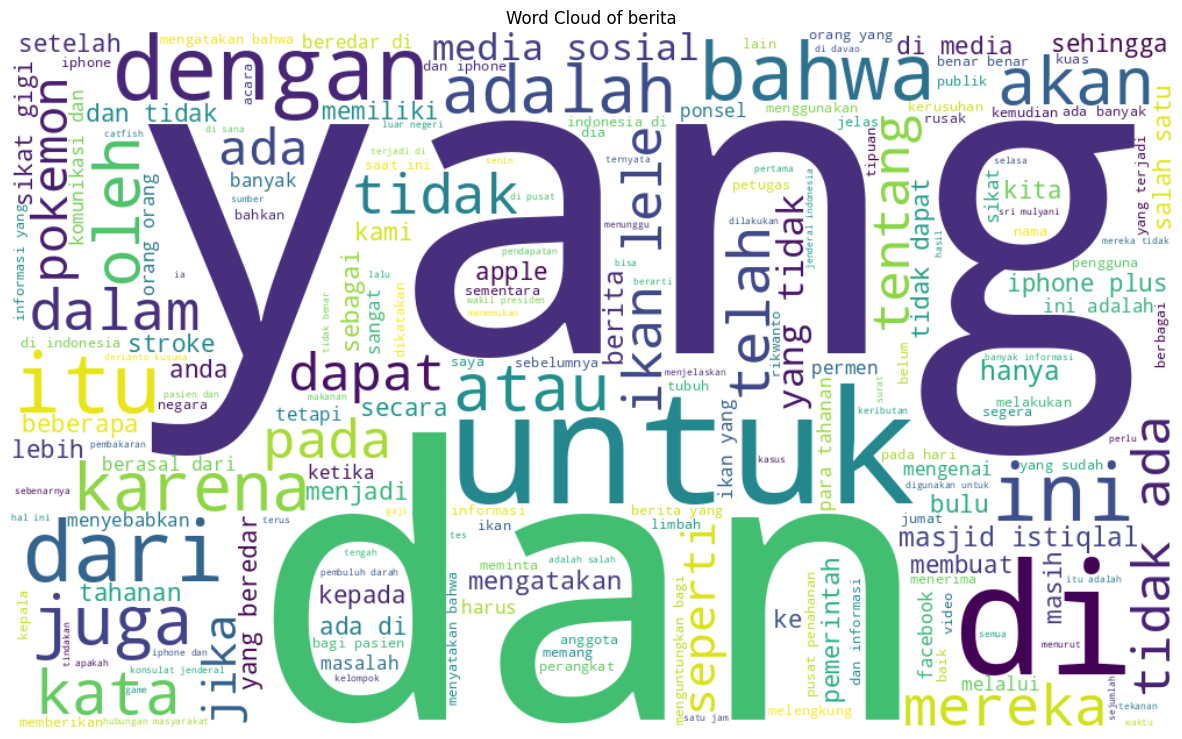

In [ ]:
# Combine all the reviews into a single string
all_reviews = ' '.join(df_valid.loc[(df_valid['tagging']=='Valid'), 'berita_id_lc'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of berita')
plt.axis('off')
plt.show()

In [ ]:
def count_words(berita):
    return len(berita.split())

In [ ]:
df_train['word_count'] = df_train['berita_id'].apply(count_words)
df_train.head()

berita tagging  \
0  Catfish is one type of fish that is rich in an...    Hoax   
1  Rumors circulated that there had been a riot a...    Hoax   
2  Recently, quite horrendous news circulated reg...   Valid   
3  This one news may be very useful for consumers...    Hoax   
4  Catfish is one of the most popular dishes, esp...   Valid   

                                           berita_id  ClassLabel  count_emoji  \
0  Lele adalah salah satu jenis ikan yang kaya ak...           0            0   
1  Rumor beredar bahwa telah terjadi kerusuhan di...           0            0   
2  Baru -baru ini, berita yang cukup mengerikan b...           1            0   
3  Berita yang satu ini mungkin sangat berguna ba...           0            0   
4  Catfish adalah salah satu hidangan paling popu...           1            0   

   urls                                    berita_id_clean usernames  \
0  None  Lele adalah salah satu jenis ikan yang kaya ak...      None   
1  None  Rumor beredar bahwa telah terjadi kerusuhan di...      None   
2  None  Baru baru ini berita yang cukup mengerikan ber...      None   
3  None  Berita yang satu ini mungkin sangat berguna ba...      None   
4  None  Catfish adalah salah satu hidangan paling popu...      None   

                                         punctuation  \
0  ., ., ,, ., ?, :, ), ., ,, ., ,, ., ,, ., -, ....   
1  ,, ,, ,, ,, (, /, /, ), ., ,, ,, -, -, ', -, ....   
2  -, ,, ., ., ., ,, -, ,, ., ,, ., :, ", ,, ,, ,...   
3  ., ,, ,, ., ,, ., ., ,, -, ., ,, -, ', ', ,, ....   
4  ,, ., ,, ., ,, ., ., ,, ,, -, ., ,, -, ., -, (...   

                                             hashtag  \
0  ., ., ,, ., ?, :, ), ., ,, ., ,, ., ,, ., -, ....   
1  ,, ,, ,, ,, (, /, /, ), ., ,, ,, -, -, ', -, ....   
2  -, ,, ., ., ., ,, -, ,, ., ,, ., :, ", ,, ,, ,...   
3  ., ,, ,, ., ,, ., ., ,, -, ., ,, -, ', ', ,, ....   
4  ,, ., ,, ., ,, ., ., ,, ,, -, ., ,, -, ., -, (...   

                                             numeric doublespace  \
0                                      3, 7, 3, 3000        None   
1                                       11, 10, 2017        None   
2                                  1000, 5, 10, 2016        None   
3           6, 5, 5, 6, 6, 6, 4, 6, 6, 6, 5, 5, 6, 6        None   
4  3, 3, 6, 2, 3, 5, 3, 3, 53, 3, 63, 28, 34, 12,...        None   

                                           stopwords  \
0  adalah, satu, yang, akan, adalah, satu, bagi, ...   
1  bahwa, telah, terjadi, di, pada, hari, yang, s...   
2  Baru, yang, cukup, mengenai, dikatakan, menggu...   
3  yang, satu, ini, mungkin, sangat, bagi, yang, ...   
4  adalah, satu, paling, terutama, dengan, dan, t...   

                                        berita_id_lc  \
0  lele adalah salah satu jenis ikan yang kaya ak...   
1  rumor beredar bahwa telah terjadi kerusuhan di...   
2  baru baru ini berita yang cukup mengerikan ber...   
3  berita yang satu ini mungkin sangat berguna ba...   
4  catfish adalah salah satu hidangan paling popu...   

                                 berita_id_stopwords  \
0  lele salah jenis ikan kaya protein hewanipecel...   
1  rumor beredar kerusuhan pusat penahanan mako b...   
2  berita mengerikan beredar sikat gigibeberapa p...   
3  berita berguna konsumen berniat membeli iphone...   
4  catfish salah hidangan populer menu pecel catf...   

                                  berita_id_stemming  \
0  lele adalah salah satu jenis ikan yang kaya ak...   
1  rumor edar bahwa telah jadi rusuh di pusat tah...   
2  baru baru ini berita yang cukup keri edar kena...   
3  berita yang satu ini mungkin sangat guna bagi ...   
4  catfish adalah salah satu hidang paling popule...   

                                  berita_id_tokenize  word_count  
0  [lele, adalah, salah, satu, jenis, ikan, yang,...         530  
1  [rumor, edar, bahwa, telah, jadi, rusuh, di, p...         179  
2  [baru, baru, ini, berita, yang, cukup, keri, e...         137  
3  [berita, yang, satu, ini, mungkin, sang

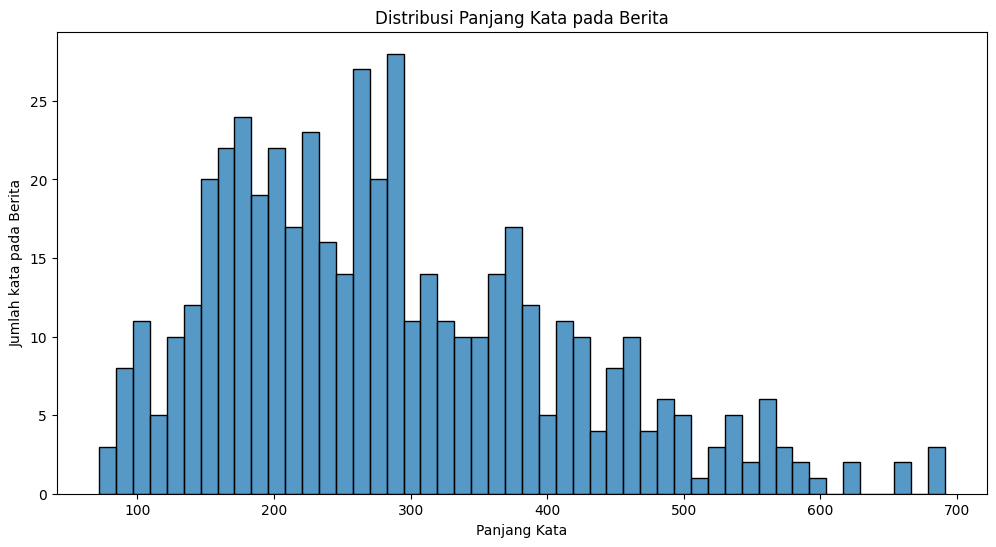

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_train['word_count'], bins=50, edgecolor='black')
plt.title('Distribusi Panjang Kata pada Berita')
plt.xlabel('Panjang Kata')
plt.ylabel('Jumlah kata pada Berita')
plt.show()

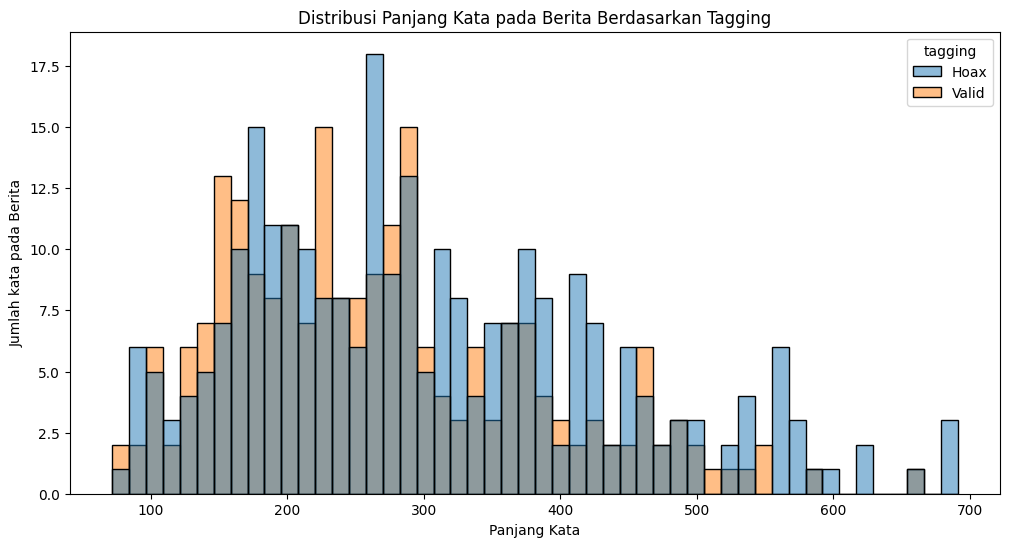

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_train, x='word_count', hue='tagging', bins=50, edgecolor='black')
plt.title('Distribusi Panjang Kata pada Berita Berdasarkan Tagging')
plt.xlabel('Panjang Kata')
plt.ylabel('Jumlah kata pada Berita')
plt.show()

# MODELLING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
parent_folder = "/content/drive/MyDrive/project BNSP/"

In [ ]:
df_train=pd.read_csv(parent_folder+'hoaxnews_train_tokenize.csv')
df_test=pd.read_csv(parent_folder+'hoaxnews_test_tokenize.csv')
df_valid=pd.read_csv(parent_folder+'hoaxnews_valid_tokenize.csv')

In [ ]:
y_train=df_train['tagging']
y_valid=df_valid['tagging']
y_test=df_test['tagging']

In [ ]:
y_train

0       Hoax
1       Hoax
2      Valid
3       Hoax
4      Valid
       ...  
488     Hoax
489     Hoax
490     Hoax
491     Hoax
492     Hoax
Name: tagging, Length: 493, dtype: object

In [ ]:
## Label Encoder

from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder pada y train
label_encoder.fit(y_train)

# transform label
y_train_encoded = label_encoder.transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
y_test_encoded = label_encoder.transform(y_test)

# cek hasil encoding
print("Mapping Label ke Angka:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")

Mapping Label ke Angka:
Hoax: 0
Valid: 1


In [ ]:
# pilih kolom tweet_stemming dari masing masing tabel
X_train_clean = df_train['berita_id_stemming']
X_test_clean = df_test['berita_id_stemming']
X_valid_clean = df_valid['berita_id_stemming']

# TFIDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_clean)

In [ ]:
from joblib import dump

# save model TF-IDF
dump(tfidf_vectorizer, parent_folder+'tfidf_vectorizer_new.joblib')

['/content/drive/MyDrive/project BNSP/tfidf_vectorizer_new.joblib']

In [ ]:
from joblib import load

# Load model TF-IDF
tfidf_vectorizer = load(parent_folder+'tfidf_vectorizer_new.joblib')

# transform set data dari load model tfidf yang telah disimpan
X_train_tfidf = tfidf_vectorizer.transform(X_train_clean)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid_clean)
X_test_tfidf = tfidf_vectorizer.transform(X_test_clean)

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
# insialisasi model random forest untuk klasifikasi
random_forest = RandomForestClassifier(n_estimators = 100,
                                       criterion = "gini",
                                       max_features = "sqrt",
                                       max_depth=6,
                                       min_samples_leaf=8,
                                       random_state = 123)

In [ ]:
# fit random forest model klasifikasi
random_forest.fit(X_train_tfidf, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=123)

In [ ]:
y_pred_rf = random_forest.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

        Hoax       0.68      0.91      0.78        90
       Valid       0.82      0.49      0.62        75

    accuracy                           0.72       165
   macro avg       0.75      0.70      0.70       165
weighted avg       0.75      0.72      0.71       165



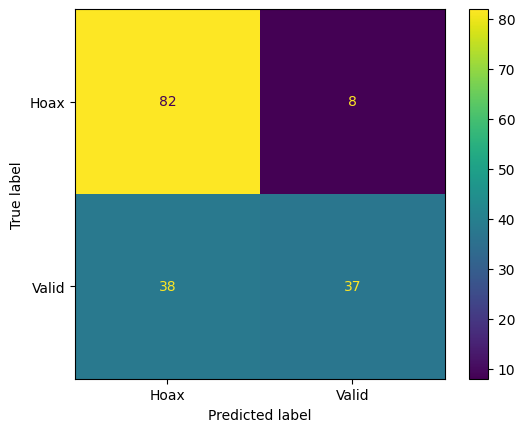

In [ ]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=unique_labels)
plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Parameter eksperimen
random_param = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

# menggunakan randomizedsearch cv untuk cross validation
random_forestcv = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=123),
                                      param_distributions=random_param,
                                      n_iter=50,
                                      cv=5,
                                      scoring="accuracy",
                                      random_state=123)

# fit pada data train
random_forestcv.fit(X_train_tfidf, y_train)

# cek parameter terbaik
best_params = random_forestcv.best_params_
print("Best parameters found: ", best_params)

# buat model dengan definisi best params
random_forest_best_cv = RandomForestClassifier(
    max_depth=best_params["max_depth"],
    criterion=best_params["criterion"],
    n_estimators=best_params["n_estimators"],
    min_samples_leaf=best_params["min_samples_leaf"],
    min_samples_split=best_params["min_samples_split"],
    random_state=123
)

# Fit model pada data train
random_forest_best_cv.fit(X_train_tfidf, y_train)

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 12, 'criterion': 'entropy'}


RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=5,
                       n_estimators=200, random_state=123)

Data test
              precision    recall  f1-score   support

        Hoax       0.79      0.91      0.85        90
       Valid       0.87      0.71      0.78        75

    accuracy                           0.82       165
   macro avg       0.83      0.81      0.81       165
weighted avg       0.83      0.82      0.82       165



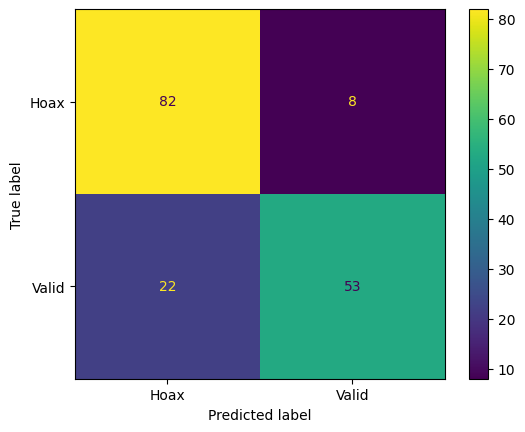

In [ ]:
# cek predict pada data test
print("Data test")
predict_random_best_cv = random_forest_best_cv.predict(X_test_tfidf)
print(classification_report(y_test, predict_random_best_cv))

# Plot confusion matrix
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, predict_random_best_cv, display_labels=unique_labels)
plt.show()

In [ ]:
from tensorflow.keras.models import save_model, load_model

In [ ]:
# Save the model to a file
with open(parent_folder+'rf_best', 'wb') as file:
    pickle.dump(random_forest_best_cv, file)
#save_model(random_forest_best_cv, parent_folder+'rf_best.h5')
#save_model(random_forest_best_cv, parent_folder+'rf_best.keras')

In [ ]:
# Since the model was saved using pickle, load it using pickle
with open(parent_folder+'rf_best', 'rb') as file:
    random_forest_best_cv = pickle.load(file)

In [ ]:
def predictsrf(berita):
    text = remove_special_character(berita)
    text = text.lower()
    text = stemming_indonesian(text)
    text = tfidf_vectorizer.transform([text])
    label = random_forest_best_cv.predict(text)
    label_desc=[]

    # Map the label to "HOAX" or "VALID"
    if label == '1':
        label_desc = "VALID"  # Assign "VALID"
    else:
        label_desc = "HOAX" # Assign "HOAX"
    return berita, label, label_desc

In [ ]:
from joblib import load

# Load model TF-IDF
tfidf_vectorizer = load(parent_folder+'tfidf_vectorizer_new.joblib')

In [ ]:
import time
start_time = time.time()
berita, label, label_desc = predictsrf(
"""
Sebuah unggahan di X menarasikan Ketua Umum (Ketum) PDI Perjuangan Megawati Soekarnoputri mengadakan sayembara bagi siapa saja yang dapat membuktikan dugaan ijazah palsu Presiden ke-7 Indonesia Joko Widodo atau Jokowi. Dalam unggahan tersebut, Megawati disebut akan memberikan hadiah Rp16 miliar bagi siapa saja yang berhasil. Berikut narasi dalam unggahan tersebut: “Terjawab sudah mengapa mereka ngotot bilang ijasah Jokowi itu palsu, biar menang sayembara 16 Milyar. Ternyata cuma demi duit. Padahal Megawati buat sayembara itu, karena tau ijasah Jokowi Asli. Jadi tidak akan ada pemenang sayembara ini, wkwk” Namun, benarkah Megawati adakan sayembara berhadiah Rp16 miliar bagi yang berhasil buktikan ijazah palsu Jokowi?
"""
)
end_time = time.time()
inference_time = end_time - start_time

print(f'berita : {berita}')
print(f'label : {label}')
print(f'label_desc : {label_desc}')
print (f'waktu pemrosesan : {inference_time}')

berita : 
Sebuah unggahan di X menarasikan Ketua Umum (Ketum) PDI Perjuangan Megawati Soekarnoputri mengadakan sayembara bagi siapa saja yang dapat membuktikan dugaan ijazah palsu Presiden ke-7 Indonesia Joko Widodo atau Jokowi. Dalam unggahan tersebut, Megawati disebut akan memberikan hadiah Rp16 miliar bagi siapa saja yang berhasil. Berikut narasi dalam unggahan tersebut: “Terjawab sudah mengapa mereka ngotot bilang ijasah Jokowi itu palsu, biar menang sayembara 16 Milyar. Ternyata cuma demi duit. Padahal Megawati buat sayembara itu, karena tau ijasah Jokowi Asli. Jadi tidak akan ada pemenang sayembara ini, wkwk” Namun, benarkah Megawati adakan sayembara berhadiah Rp16 miliar bagi yang berhasil buktikan ijazah palsu Jokowi?

label : ['Hoax']
label_desc : HOAX
waktu pemrosesan : 0.016885995864868164


# LSTM

In [ ]:
import jax
import jaxlib
import tensorflow as tf

num_devices = jax.device_count()
device_type = jax.devices()[0].device_kind

print(f"tensorflow version: {tf.__version__}")
print(f"jax version: {jax.__version__}")
print(f"jaxlib version: {jaxlib.__version__}")
print(f"Found {num_devices} JAX devices of type {device_type}.")

tensorflow version: 2.18.0
jax version: 0.5.2
jaxlib version: 0.5.1
Found 1 JAX devices of type cpu.


In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Konversi sparse matrix ke dense array
X_train_dense = X_train_tfidf.toarray()
X_valid_dense = X_valid_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

In [ ]:
X_train_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# LSTM (timesteps = 1)
X_train_lstm = np.expand_dims(X_train_dense, axis=1)
X_valid_lstm = np.expand_dims(X_valid_dense, axis=1)
X_test_lstm = np.expand_dims(X_test_dense, axis=1)

In [ ]:
X_train_lstm

array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from tensorflow.keras.models import save_model

In [ ]:
# Membuat model
model = Sequential()
model.add(Dense(128, input_dim=X_train_tfidf.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)

In [ ]:
# Fit model
history = model.fit(X_train_dense, y_train_encoded,
                    validation_data=(X_valid_dense, y_valid_encoded),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4936 - loss: 1.0910 - val_accuracy: 0.5427 - val_loss: 1.0775
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5436 - loss: 1.0715 - val_accuracy: 0.5488 - val_loss: 1.0550
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6041 - loss: 1.0473 - val_accuracy: 0.5488 - val_loss: 1.0256
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5643 - loss: 1.0182 - val_accuracy: 0.5488 - val_loss: 0.9900
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5854 - loss: 0.9808 - val_accuracy: 0.5488 - val_loss: 0.9487
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5703 - loss: 0.9449 - val_accuracy: 0.5488 - val_loss: 0.9055
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5739 - loss: 0.8981 - val_accuracy: 0.5488 - val_loss: 0.8626
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5969 - loss: 0.8530 - val_accuracy: 0.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Data test
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        90
           1       0.77      0.83      0.79        75

    accuracy                           0.81       165
   macro avg       0.81      0.81      0.81       165
weighted avg       0.81      0.81      0.81       165



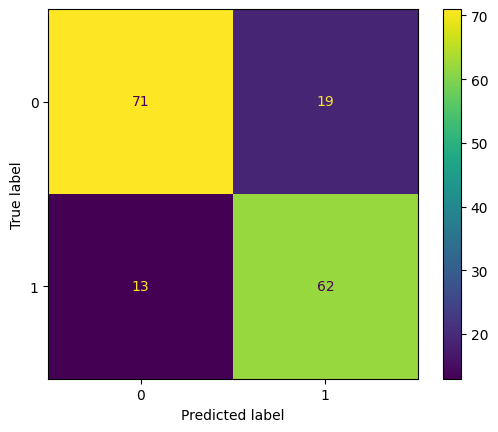

In [ ]:
# evaluate model
y_pred = model.predict(X_test_dense)
y_pred_classes = np.argmax(y_pred, axis=1)

# cek predict pada data test
print("Data test")
print(classification_report(y_test_encoded, y_pred_classes))

# Plot confusion matrix
unique_labels = np.unique(y_test_encoded)
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_classes, display_labels=unique_labels)
plt.show()

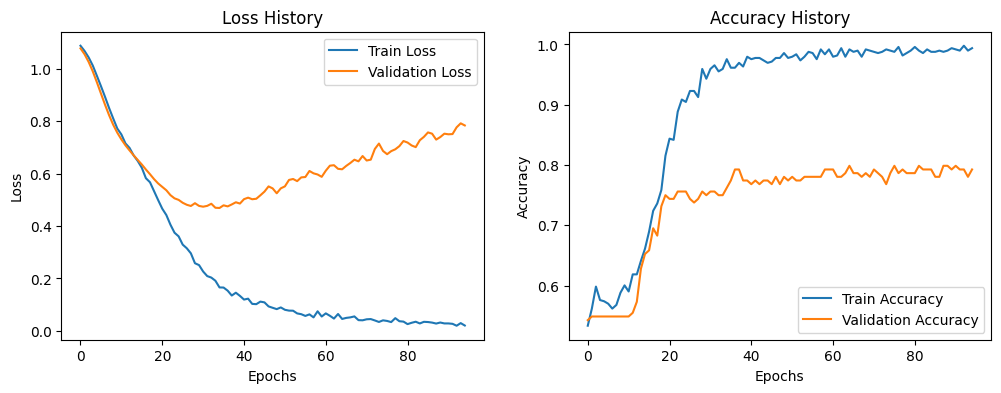

In [ ]:
# Plotting loss dan accuracy
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss History')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy History')

    plt.show()

plot_history(history)

In [ ]:
# Save the model to a file
with open(parent_folder+'lstm.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open(parent_folder+'lstm.pkl', 'rb') as file:
    modellstm = pickle.load(file)

In [ ]:
save_model(model, parent_folder+'lstm.h5')

In [ ]:
save_model(model, parent_folder+'lstm.keras')

In [ ]:
modellstm=tf.keras.models.load_model(parent_folder+'lstm.keras')

In [ ]:
def remove_special_character(text):
    # Mengganti special characters dan punctuation dengan string kosong
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.tokenize import word_tokenize

# Donwload punkt
nltk.download('punkt')
nltk.download('punkt_tab')

# Definisi sastrawi untuk stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemming teks dengan Sastrawi
def stemming_indonesian(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def predictsrf(berita):
    text = remove_special_character(berita)
    text = text.lower()
    text = stemming_indonesian(text)
    text = tfidf_vectorizer.transform([text])
    text = text.toarray()
    label = modellstm.predict(text)
    label = np.argmax(label, axis=1)
    label_desc=[]

    # Map the label to "HOAX" or "VALID"
    if label == '1':
        label_desc = "VALID"  # Assign "VALID"
    else:
        label_desc = "HOAX" # Assign "HOAX"
    return berita, label, label_desc

In [ ]:
import time
start_time = time.time()
berita, label, label_desc = predictsrf(
"""
Sebuah unggahan di X menarasikan Ketua Umum (Ketum) PDI Perjuangan Megawati Soekarnoputri mengadakan sayembara bagi siapa saja yang dapat membuktikan dugaan ijazah palsu Presiden ke-7 Indonesia Joko Widodo atau Jokowi. Dalam unggahan tersebut, Megawati disebut akan memberikan hadiah Rp16 miliar bagi siapa saja yang berhasil. Berikut narasi dalam unggahan tersebut: “Terjawab sudah mengapa mereka ngotot bilang ijasah Jokowi itu palsu, biar menang sayembara 16 Milyar. Ternyata cuma demi duit. Padahal Megawati buat sayembara itu, karena tau ijasah Jokowi Asli. Jadi tidak akan ada pemenang sayembara ini, wkwk” Namun, benarkah Megawati adakan sayembara berhadiah Rp16 miliar bagi yang berhasil buktikan ijazah palsu Jokowi?
"""
)
end_time = time.time()
inference_time = end_time - start_time

print(f'berita : {berita}')
print(f'label : {label}')
print(f'label_desc : {label_desc}')
print (f'waktu pemrosesan : {inference_time}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
berita : 
Sebuah unggahan di X menarasikan Ketua Umum (Ketum) PDI Perjuangan Megawati Soekarnoputri mengadakan sayembara bagi siapa saja yang dapat membuktikan dugaan ijazah palsu Presiden ke-7 Indonesia Joko Widodo atau Jokowi. Dalam unggahan tersebut, Megawati disebut akan memberikan hadiah Rp16 miliar bagi siapa saja yang berhasil. Berikut narasi dalam unggahan tersebut: “Terjawab sudah mengapa mereka ngotot bilang ijasah Jokowi itu palsu, biar menang sayembara 16 Milyar. Ternyata cuma demi duit. Padahal Megawati buat sayembara itu, karena tau ijasah Jokowi Asli. Jadi tidak akan ada pemenang sayembara ini, wkwk” Namun, benarkah Megawati adakan sayembara berhadiah Rp16 miliar bagi yang berhasil buktikan ijazah palsu Jokowi?

label : [0]
label_desc : HOAX
waktu pemrosesan : 0.2017042636871338


# FINETUNING PRETRAINED MODEL BERT, ROBERTA, INDOBERT

# BERT

In [ ]:
dataset_run = dataset.remove_columns(['tagging', 'berita_id'])
print(dataset_run)

DatasetDict({
    train: Dataset({
        features: ['berita', 'ClassLabel'],
        num_rows: 493
    })
    test: Dataset({
        features: ['berita', 'ClassLabel'],
        num_rows: 165
    })
    valid: Dataset({
        features: ['berita', 'ClassLabel'],
        num_rows: 164
    })
})


In [ ]:
def rename_column(example):
    example['text'] = example.pop('berita')
    example['label'] = example.pop('ClassLabel')  # Rename the column
    return example

# Apply the renaming to each split in the dataset
for split in dataset_run.keys():
    dataset_run[split] = dataset_run[split].map(rename_column)

Map:   0%|          | 0/493 [00:00<?, ? examples/s]

Map:   0%|          | 0/165 [00:00<?, ? examples/s]

Map:   0%|          | 0/164 [00:00<?, ? examples/s]

In [ ]:
dataset_run['train'][3]

{'text': "This one news may be very useful for consumers who intend to buy the iPhone 6 Plus when it is released in the Indonesian market. After a few days of being released in a number of countries, Apple's new smartphone 5.5-inch jumbo sail that began to reap protests from users. According to reports by some iPhone 6 Plus users, The biggest screen iPhone turns out to be easy to bend when stored for too long in the trouser pocket. This incident was first reported by an owner The iPhone 6 is named Hanzon on the MacRumors forum site. He claimed to keep the iPhone 6 Plus in a trouser pocket for approximately 4 hours, and perform daily activities as usual. When taken out, Hanzon was surprised when he saw the middle His iPhone 6 Plus is slightly 'bent', aka curved. Not only Hanzon, another user named Devin Pitcher also boundary expressed a similar complaint on the forum. Devin claims to keep the new iPhone 6 Plus his in his front trouser pocket. When removed, even the middle of the iPhone 

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
def preprocess_function(examples):
   return tokenizer(examples["text"], truncation=True)

tokenized_train = dataset_run['train'].map(preprocess_function, batched=True)
tokenized_test = dataset_run['test'].map(preprocess_function, batched=True)
tokenized_valid = dataset_run['valid'].map(preprocess_function, batched=True)

Map:   0%|          | 0/493 [00:00<?, ? examples/s]

Map:   0%|          | 0/165 [00:00<?, ? examples/s]

Map:   0%|          | 0/164 [00:00<?, ? examples/s]

In [ ]:
from transformers import BertForSequenceClassification
#model =BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased", num_labels=2,problem_type="multi_label_classification")
model =BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
#from datasets import load_metric
import evaluate
from torch.nn import BCEWithLogitsLoss # import the function

def compute_metrics(eval_pred):
   load_accuracy = evaluate.load("accuracy")
   load_f1 = evaluate.load("f1")
   load_recall = evaluate.load("recall")
   load_precision = evaluate.load("precision")
   #load_roc_auc = evaluate.load("roc_auc")

   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   recall = load_recall.compute(predictions=predictions, references=labels)["recall"]
   precision = load_precision.compute(predictions=predictions, references=labels)["precision"]
   #roc_auc=load_roc_auc.compute(predictions=predictions, references=labels)["roc_auc"]
   return {"accuracy": accuracy, "f1": f1, "recall": recall, "precision": precision} #"roc_auc":roc_auc

In [ ]:
from transformers import TrainingArguments, Trainer

repo_name = "./hoax_bert"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   logging_steps=10,
   metric_for_best_model="accuracy",
   push_to_hub=True
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_valid,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

TrainOutput(global_step=62, training_loss=0.18405561677871213, metrics={'train_runtime': 48.06, 'train_samples_per_second': 20.516, 'train_steps_per_second': 1.29, 'total_flos': 259427500584960.0, 'train_loss': 0.18405561677871213, 'epoch': 2.0})

In [ ]:
trainer.evaluate(tokenized_test)

{'eval_loss': 0.6394992470741272,
 'eval_accuracy': 0.7757575757575758,
 'eval_f1': 0.7516778523489933,
 'eval_recall': 0.7466666666666667,
 'eval_precision': 0.7567567567567568,
 'eval_runtime': 9.6469,
 'eval_samples_per_second': 17.104,
 'eval_steps_per_second': 1.14,
 'epoch': 2.0}

In [ ]:
tokenizer.push_to_hub("hoax_bert")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/anggari/hoax_bert/commit/569490ea42f8f9c9bae9d83536522e84a957872b', commit_message='Upload tokenizer', commit_description='', oid='569490ea42f8f9c9bae9d83536522e84a957872b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/anggari/hoax_bert', endpoint='https://huggingface.co', repo_type='model', repo_id='anggari/hoax_bert'), pr_revision=None, pr_num=None)

In [ ]:
from transformers import pipeline

sentiment_model = pipeline(model="anggari/hoax_bert")

def predicts(berita):
    translated_text = translate_text(berita, 'en')
    text = sentiment_model([translated_text])
    # Access the label from the dictionary
    label = text[0]['label']

    # Map the label to "HOAX" or "VALID"
    if label == 'LABEL_1':
        text[0]['label_desc'] = "VALID"  # Assign "HOAX"
    else:
        text[0]['label_desc'] = "HOAX" # Assign "VALID"
    return berita, translated_text, text

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
import time

In [ ]:
start_time = time.time()
berita, translasi_berita, text = predicts("Sebuah unggahan di X menarasikan Ketua Umum (Ketum) PDI Perjuangan Megawati Soekarnoputri mengadakan sayembara bagi siapa saja yang dapat membuktikan dugaan ijazah palsu Presiden ke-7 Indonesia Joko Widodo atau Jokowi. Dalam unggahan tersebut, Megawati disebut akan memberikan hadiah Rp16 miliar bagi siapa saja yang berhasil. Berikut narasi dalam unggahan tersebut: “Terjawab sudah mengapa mereka ngotot bilang ijasah Jokowi itu palsu, biar menang sayembara 16 Milyar. Ternyata cuma demi duit. Padahal Megawati buat sayembara itu, karena tau ijasah Jokowi Asli. Jadi tidak akan ada pemenang sayembara ini, wkwk” Namun, benarkah Megawati adakan sayembara berhadiah Rp16 miliar bagi yang berhasil buktikan ijazah palsu Jokowi?")
end_time = time.time()
inference_time = end_time - start_time

print(f'berita : {berita}')
print(f'translasi berita: {translasi_berita}')
print(f'hasil prediksi : {text}')
print (f'waktu pemrosesan : {inference_time}')

berita : Sebuah unggahan di X menarasikan Ketua Umum (Ketum) PDI Perjuangan Megawati Soekarnoputri mengadakan sayembara bagi siapa saja yang dapat membuktikan dugaan ijazah palsu Presiden ke-7 Indonesia Joko Widodo atau Jokowi. Dalam unggahan tersebut, Megawati disebut akan memberikan hadiah Rp16 miliar bagi siapa saja yang berhasil. Berikut narasi dalam unggahan tersebut: “Terjawab sudah mengapa mereka ngotot bilang ijasah Jokowi itu palsu, biar menang sayembara 16 Milyar. Ternyata cuma demi duit. Padahal Megawati buat sayembara itu, karena tau ijasah Jokowi Asli. Jadi tidak akan ada pemenang sayembara ini, wkwk” Namun, benarkah Megawati adakan sayembara berhadiah Rp16 miliar bagi yang berhasil buktikan ijazah palsu Jokowi?
translasi berita: An upload in X narrated the General Chairperson (Ketum) of PDI Perjuangan Megawati Soekarnoputri held a contest for anyone who could prove the alleged fake diploma of the 7th President of Indonesia Joko Widodo or Jokowi.In the upload, Megawati was

In [ ]:
start_time = time.time()
berita, translasi_berita, text = predicts(
"""
Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jakarta Barat, Selasa (13/5/2025). Kabid Humas Polda Metro Jaya Kombes Pol Ade Ary Syam Indradi mengatakan, mereka mengelola parkir liar dan mengutip sejumlah uang kepada pedagang kaki lima (PKL) yang berjualan di wilayah Puri Indah. “Ini ada beberapa barang bukti karcis yang mereka cetak sendiri, kemudian ini ada rekapan hasil pungutan. Dan hasil dialog kami dengan rekan-rekan pedagang kaki lima, mereka dipungut oleh beberapa orang yang tidak mau mengaku dari organisasi mana,” ujar Ade Ary, Selasa malam. “Namun hasil pendalaman dari teman-teman kami dari jajaran reserse, mereka ada yang berasal dari sebuah ormas inisial G, dan yang kedua berasal dari ormas inisial F, dan ada juga yang berasal dari karang taruna,” tambah dia. Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jakarta Barat, Selasa (13/5/2025). Kabid Humas Polda Metro Jaya Kombes Pol Ade Ary Syam Indradi mengatakan, mereka mengelola parkir liar dan mengutip sejumlah uang kepada pedagang kaki lima (PKL) yang berjualan di wilayah Puri Indah. “Ini ada beberapa barang bukti karcis yang mereka cetak sendiri, kemudian ini ada rekapan hasil pungutan. Dan hasil dialog kami dengan rekan-rekan pedagang kaki lima, mereka dipungut oleh beberapa orang yang tidak mau mengaku dari organisasi mana,” ujar Ade Ary, Selasa malam. “Namun hasil pendalaman dari teman-teman kami dari jajaran reserse, mereka ada yang berasal dari sebuah ormas inisial G, dan yang kedua berasal dari ormas inisial F, dan ada juga yang berasal dari karang taruna,” tambah dia. Tak berselang lama, Kepala Bagian Operasi Polres Metro Jakarta Barat AKBP Tri Bayu Nugroho langsung menginterogasi mereka. Pada momen ini, para anggota ormas mengungkap sosok penanggung jawab keanggotaan mereka. Mulanya Bayu meminta para pelaku yang berasal dari salah satu ormas tertentu mengangkat tangan.
"""
)
end_time = time.time()
inference_time = end_time - start_time

print(f'berita : {berita}')
print(f'translasi berita: {translasi_berita}')
print(f'hasil prediksi : {text}')
print (f'waktu pemrosesan : {inference_time}')

berita : 
Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jakarta Barat, Selasa (13/5/2025). Kabid Humas Polda Metro Jaya Kombes Pol Ade Ary Syam Indradi mengatakan, mereka mengelola parkir liar dan mengutip sejumlah uang kepada pedagang kaki lima (PKL) yang berjualan di wilayah Puri Indah. “Ini ada beberapa barang bukti karcis yang mereka cetak sendiri, kemudian ini ada rekapan hasil pungutan. Dan hasil dialog kami dengan rekan-rekan pedagang kaki lima, mereka dipungut oleh beberapa orang yang tidak mau mengaku dari organisasi mana,” ujar Ade Ary, Selasa malam. “Namun hasil pendalaman dari teman-teman kami dari jajaran reserse, mereka ada yang berasal dari sebuah ormas inisial G, dan yang kedua berasal dari ormas inisial F, dan ada juga yang berasal dari karang taruna,” tambah dia. Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jaka

In [ ]:
start_time = time.time()
berita, translasi_berita, text = predicts(
df_test['berita'][4]
)
end_time = time.time()
inference_time = end_time - start_time

print(f'berita : {berita}')
print(f'translasi berita: {translasi_berita}')
print(f'hasil prediksi : {text}')
print (f'waktu pemrosesan : {inference_time}')

berita : The Head of the Public Information Bureau of the Public Relations Division of the National Police Brigadier General Rikwanto denied the rioting at the Brimob Command Headquarters Salemba Terrorist Detention Center in custody Kelapa Dua, Depok, on Friday afternoon, November 10, 2017 at 16.00 WIB, was caused by ethnic, religious, racial and intergroup issues. (Sara). "If there are wild rumors that this incident was triggered by the throwing of the Koran by officers, that is not true," said Rikwanto in a written statement on Friday night, November 10, 2017. 88 Anti-terrorism, provocation. As a result of the riots, said Rikwanto, there was a lot of damage to the detention center facilities, even the door of the detention cell was broken. "There are many facilities at the detention center that have been damaged, such as the door of the prison cell being broken into, the gate of the hallway block, the window panes (in block C and block B)," said Rikwanto. Rikwanto explained that aft

In [ ]:
df_test.iloc[4]

berita        The Head of the Public Information Bureau of t...
tagging                                                   Valid
berita_id     Kepala Biro Informasi Publik Divisi Hubungan M...
ClassLabel                                                    1
Name: 4, dtype: object

In [ ]:
df_test.iloc[0]

berita        The riot took place at the Brimob Mako Detenti...
tagging                                                    Hoax
berita_id     Kerusuhan itu terjadi di Pusat Penahanan Brimo...
ClassLabel                                                    0
Name: 0, dtype: object

In [ ]:
start_time = time.time()
berita, translasi_berita, text = predicts(
df_test['berita'][0]
)
end_time = time.time()
inference_time = end_time - start_time

print(f'berita : {berita}')
print(f'translasi berita: {translasi_berita}')
print(f'hasil prediksi : {text}')
print (f'waktu pemrosesan : {inference_time}')

berita : The riot took place at the Brimob Mako Detention Center, Kelapa Dua, Depok, West Java. The commotion that occurred in the detention center for terrorists caused a number of prison facilities to be damaged. Mako Brimob Terrorist Prison This news was confirmed by the Head of the Public Information Bureau of the National Police Public Relations Division, general Brigadier General Rikwanto, who explained that the commotion occurred on Friday (11/10/2017), around 16.00 WIB. "On Friday, November 10 2017, at 16.00 WIB there was a commotion at the Mako Brimob terrorist detention center Salemba prison branch carried out by terrorist prisoners," said Rikwanto. A number of prison facilities, such as the door of the detention cell, the gate of the block hallway and the window panes in Block C and Block B were damaged. Rikwanto also added that the situation was now under control. Regarding the issue that had been spread which stated that the cause of the riot was because of the throwing of

#XLM ROBERTA FINETUNE


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("FacebookAI/xlm-roberta-base")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
def preprocess_function(examples):
   return tokenizer(examples["text"], truncation=True)

tokenized_train = dataset_run['train'].map(preprocess_function, batched=True)
tokenized_test = dataset_run['test'].map(preprocess_function, batched=True)
tokenized_valid = dataset_run['valid'].map(preprocess_function, batched=True)

Map:   0%|          | 0/493 [00:00<?, ? examples/s]

Map:   0%|          | 0/165 [00:00<?, ? examples/s]

Map:   0%|          | 0/164 [00:00<?, ? examples/s]

In [ ]:
from transformers import XLMRobertaForSequenceClassification
model = XLMRobertaForSequenceClassification.from_pretrained("FacebookAI/xlm-roberta-base", num_labels=2)

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments, Trainer

repo_name = "./xlmroberta"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   logging_steps=10,
   metric_for_best_model="accuracy",
   push_to_hub=True
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_valid,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

TrainOutput(global_step=62, training_loss=0.6925298033222076, metrics={'train_runtime': 69.5654, 'train_samples_per_second': 14.174, 'train_steps_per_second': 0.891, 'total_flos': 259427500584960.0, 'train_loss': 0.6925298033222076, 'epoch': 2.0})

In [ ]:
trainer.evaluate(tokenized_test)

{'eval_loss': 0.6872990727424622,
 'eval_accuracy': 0.5454545454545454,
 'eval_f1': 0.0,
 'eval_recall': 0.0,
 'eval_precision': 0.0,
 'eval_runtime': 7.4659,
 'eval_samples_per_second': 22.1,
 'eval_steps_per_second': 1.473,
 'epoch': 2.0}

In [ ]:
tokenizer.push_to_hub("xlmroberta")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/anggari/xlmroberta/commit/32f556076237cbdf546fc07a4ccb1699235c28fe', commit_message='Upload tokenizer', commit_description='', oid='32f556076237cbdf546fc07a4ccb1699235c28fe', pr_url=None, repo_url=RepoUrl('https://huggingface.co/anggari/xlmroberta', endpoint='https://huggingface.co', repo_type='model', repo_id='anggari/xlmroberta'), pr_revision=None, pr_num=None)

In [ ]:
from transformers import TrainingArguments, Trainer

repo_name = "./xlmrobertatuning"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=8,
   per_device_eval_batch_size=8,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   logging_steps=10,
   metric_for_best_model="accuracy",
   push_to_hub=True
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_valid,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics)

In [ ]:
trainer.train()

TrainOutput(global_step=124, training_loss=0.6468953009574644, metrics={'train_runtime': 71.8146, 'train_samples_per_second': 13.73, 'train_steps_per_second': 1.727, 'total_flos': 259010736784380.0, 'train_loss': 0.6468953009574644, 'epoch': 2.0})

In [ ]:
trainer.evaluate(tokenized_test)

{'eval_loss': 0.5670943260192871,
 'eval_accuracy': 0.7454545454545455,
 'eval_f1': 0.7162162162162162,
 'eval_recall': 0.7066666666666667,
 'eval_precision': 0.726027397260274,
 'eval_runtime': 7.114,
 'eval_samples_per_second': 23.194,
 'eval_steps_per_second': 2.952,
 'epoch': 2.0}

In [ ]:
tokenizer.push_to_hub("xlmrobertatuning")

CommitInfo(commit_url='https://huggingface.co/anggari/xlmrobertatuning/commit/b7efe03ef3ef4fc5715593e9606ec31648a1acea', commit_message='Upload tokenizer', commit_description='', oid='b7efe03ef3ef4fc5715593e9606ec31648a1acea', pr_url=None, repo_url=RepoUrl('https://huggingface.co/anggari/xlmrobertatuning', endpoint='https://huggingface.co', repo_type='model', repo_id='anggari/xlmrobertatuning'), pr_revision=None, pr_num=None)

In [ ]:
from transformers import pipeline

sentiment_model = pipeline(model="anggari/xlmroberta")

def predicts(berita):
    translated_text = translate_text(berita, 'en')
    text = sentiment_model([translated_text])
    # Access the label from the dictionary
    label = text[0]['label']

    # Map the label to "HOAX" or "VALID"
    if label == 'LABEL_1':
        text[0]['label_desc'] = "VALID"  # Assign "VALID"
    else:
        text[0]['label_desc'] = "HOAX" # Assign "HOAX"
    return berita, translated_text, text

config.json:   0%|          | 0.00/731 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
start_time = time.time()
berita, translasi_berita, text = predicts("Sebuah unggahan di X menarasikan Ketua Umum (Ketum) PDI Perjuangan Megawati Soekarnoputri mengadakan sayembara bagi siapa saja yang dapat membuktikan dugaan ijazah palsu Presiden ke-7 Indonesia Joko Widodo atau Jokowi. Dalam unggahan tersebut, Megawati disebut akan memberikan hadiah Rp16 miliar bagi siapa saja yang berhasil. Berikut narasi dalam unggahan tersebut: “Terjawab sudah mengapa mereka ngotot bilang ijasah Jokowi itu palsu, biar menang sayembara 16 Milyar. Ternyata cuma demi duit. Padahal Megawati buat sayembara itu, karena tau ijasah Jokowi Asli. Jadi tidak akan ada pemenang sayembara ini, wkwk” Namun, benarkah Megawati adakan sayembara berhadiah Rp16 miliar bagi yang berhasil buktikan ijazah palsu Jokowi?")
end_time = time.time()
inference_time = end_time - start_time

print(f'berita : {berita}')
print(f'translasi berita: {translasi_berita}')
print(f'hasil prediksi : {text}')
print (f'waktu pemrosesan : {inference_time}')

berita : Sebuah unggahan di X menarasikan Ketua Umum (Ketum) PDI Perjuangan Megawati Soekarnoputri mengadakan sayembara bagi siapa saja yang dapat membuktikan dugaan ijazah palsu Presiden ke-7 Indonesia Joko Widodo atau Jokowi. Dalam unggahan tersebut, Megawati disebut akan memberikan hadiah Rp16 miliar bagi siapa saja yang berhasil. Berikut narasi dalam unggahan tersebut: “Terjawab sudah mengapa mereka ngotot bilang ijasah Jokowi itu palsu, biar menang sayembara 16 Milyar. Ternyata cuma demi duit. Padahal Megawati buat sayembara itu, karena tau ijasah Jokowi Asli. Jadi tidak akan ada pemenang sayembara ini, wkwk” Namun, benarkah Megawati adakan sayembara berhadiah Rp16 miliar bagi yang berhasil buktikan ijazah palsu Jokowi?
translasi berita: An upload in X narrated the General Chairperson (Ketum) of PDI Perjuangan Megawati Soekarnoputri held a contest for anyone who could prove the alleged fake diploma of the 7th President of Indonesia Joko Widodo or Jokowi.In the upload, Megawati was

In [ ]:
start_time = time.time()
berita, translasi_berita, text = predicts(
"""
Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jakarta Barat, Selasa (13/5/2025). Kabid Humas Polda Metro Jaya Kombes Pol Ade Ary Syam Indradi mengatakan, mereka mengelola parkir liar dan mengutip sejumlah uang kepada pedagang kaki lima (PKL) yang berjualan di wilayah Puri Indah. “Ini ada beberapa barang bukti karcis yang mereka cetak sendiri, kemudian ini ada rekapan hasil pungutan. Dan hasil dialog kami dengan rekan-rekan pedagang kaki lima, mereka dipungut oleh beberapa orang yang tidak mau mengaku dari organisasi mana,” ujar Ade Ary, Selasa malam. “Namun hasil pendalaman dari teman-teman kami dari jajaran reserse, mereka ada yang berasal dari sebuah ormas inisial G, dan yang kedua berasal dari ormas inisial F, dan ada juga yang berasal dari karang taruna,” tambah dia. Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jakarta Barat, Selasa (13/5/2025). Kabid Humas Polda Metro Jaya Kombes Pol Ade Ary Syam Indradi mengatakan, mereka mengelola parkir liar dan mengutip sejumlah uang kepada pedagang kaki lima (PKL) yang berjualan di wilayah Puri Indah. “Ini ada beberapa barang bukti karcis yang mereka cetak sendiri, kemudian ini ada rekapan hasil pungutan. Dan hasil dialog kami dengan rekan-rekan pedagang kaki lima, mereka dipungut oleh beberapa orang yang tidak mau mengaku dari organisasi mana,” ujar Ade Ary, Selasa malam. “Namun hasil pendalaman dari teman-teman kami dari jajaran reserse, mereka ada yang berasal dari sebuah ormas inisial G, dan yang kedua berasal dari ormas inisial F, dan ada juga yang berasal dari karang taruna,” tambah dia. Tak berselang lama, Kepala Bagian Operasi Polres Metro Jakarta Barat AKBP Tri Bayu Nugroho langsung menginterogasi mereka. Pada momen ini, para anggota ormas mengungkap sosok penanggung jawab keanggotaan mereka. Mulanya Bayu meminta para pelaku yang berasal dari salah satu ormas tertentu mengangkat tangan.
"""
)
end_time = time.time()
inference_time = end_time - start_time

print(f'berita : {berita}')
print(f'translasi berita: {translasi_berita}')
print(f'hasil prediksi : {text}')
print (f'waktu pemrosesan : {inference_time}')

berita : 
Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jakarta Barat, Selasa (13/5/2025). Kabid Humas Polda Metro Jaya Kombes Pol Ade Ary Syam Indradi mengatakan, mereka mengelola parkir liar dan mengutip sejumlah uang kepada pedagang kaki lima (PKL) yang berjualan di wilayah Puri Indah. “Ini ada beberapa barang bukti karcis yang mereka cetak sendiri, kemudian ini ada rekapan hasil pungutan. Dan hasil dialog kami dengan rekan-rekan pedagang kaki lima, mereka dipungut oleh beberapa orang yang tidak mau mengaku dari organisasi mana,” ujar Ade Ary, Selasa malam. “Namun hasil pendalaman dari teman-teman kami dari jajaran reserse, mereka ada yang berasal dari sebuah ormas inisial G, dan yang kedua berasal dari ormas inisial F, dan ada juga yang berasal dari karang taruna,” tambah dia. Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jaka

In [ ]:
start_time = time.time()
berita, translasi_berita, text = predicts(
df_test['berita'][0]
)
end_time = time.time()
inference_time = end_time - start_time

print(f'berita : {berita}')
print(f'translasi berita: {translasi_berita}')
print(f'hasil prediksi : {text}')
print (f'waktu pemrosesan : {inference_time}')

berita : The riot took place at the Brimob Mako Detention Center, Kelapa Dua, Depok, West Java. The commotion that occurred in the detention center for terrorists caused a number of prison facilities to be damaged. Mako Brimob Terrorist Prison This news was confirmed by the Head of the Public Information Bureau of the National Police Public Relations Division, general Brigadier General Rikwanto, who explained that the commotion occurred on Friday (11/10/2017), around 16.00 WIB. "On Friday, November 10 2017, at 16.00 WIB there was a commotion at the Mako Brimob terrorist detention center Salemba prison branch carried out by terrorist prisoners," said Rikwanto. A number of prison facilities, such as the door of the detention cell, the gate of the block hallway and the window panes in Block C and Block B were damaged. Rikwanto also added that the situation was now under control. Regarding the issue that had been spread which stated that the cause of the riot was because of the throwing of

In [ ]:
df_test.iloc[0]

berita        The riot took place at the Brimob Mako Detenti...
tagging                                                    Hoax
berita_id     Kerusuhan itu terjadi di Pusat Penahanan Brimo...
ClassLabel                                                    0
Name: 0, dtype: object

# INDOBERT


In [ ]:
dataset_run = dataset.remove_columns(['tagging', 'berita'])
print(dataset_run)

DatasetDict({
    train: Dataset({
        features: ['berita_id', 'ClassLabel'],
        num_rows: 493
    })
    test: Dataset({
        features: ['berita_id', 'ClassLabel'],
        num_rows: 165
    })
    valid: Dataset({
        features: ['berita_id', 'ClassLabel'],
        num_rows: 164
    })
})


In [ ]:
# Remove rows with missing values in the dataset_run
dataset_run = dataset_run.filter(lambda example: example['berita_id'] is not None and example['ClassLabel'] is not None)

# Verify if any missing values remain
print(dataset_run.filter(lambda example: example['berita_id'] is None or example['ClassLabel'] is None))

Filter:   0%|          | 0/493 [00:00<?, ? examples/s]

Filter:   0%|          | 0/165 [00:00<?, ? examples/s]

Filter:   0%|          | 0/164 [00:00<?, ? examples/s]

Filter:   0%|          | 0/493 [00:00<?, ? examples/s]

Filter:   0%|          | 0/165 [00:00<?, ? examples/s]

Filter:   0%|          | 0/164 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['berita_id', 'ClassLabel'],
        num_rows: 0
    })
    test: Dataset({
        features: ['berita_id', 'ClassLabel'],
        num_rows: 0
    })
    valid: Dataset({
        features: ['berita_id', 'ClassLabel'],
        num_rows: 0
    })
})


In [ ]:
dataset_run['train']

Dataset({
    features: ['berita_id', 'ClassLabel'],
    num_rows: 493
})

In [ ]:
def rename_column(example):
    example['text'] = example.pop('berita_id')
    example['label'] = example.pop('ClassLabel')  # Rename the column
    return example

# Apply the renaming to each split in the dataset
for split in dataset_run.keys():
    dataset_run[split] = dataset_run[split].map(rename_column)

Map:   0%|          | 0/493 [00:00<?, ? examples/s]

Map:   0%|          | 0/165 [00:00<?, ? examples/s]

Map:   0%|          | 0/164 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("Rifky/indobert-hoax-classification")

tokenizer_config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/709k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
dataset_run['train']['text'][1]

'Rumor beredar bahwa telah terjadi kerusuhan di Pusat Penahanan Mako Brimob, Kelapa Dua, Depok, Jawa Barat, pada hari Jumat (11/10/2017).Dari informasi yang disusun, seperti dikutip oleh saluran media sosial, dinyatakan bahwa tahanan yang didakwa dengan kasus -kasus terorisme marah oleh berita bahwa para penjaga diduga melecehkan Al -Qur\'an dan buku -buku ulama milik para tahanan."Densus dan sipir dengan sombong memasuki kamar Ikhwan dan Alquran diinjak oleh Brimob, sipir dan Densus akhirnya menyebabkan Ikhwan mengamuk dan menghancurkan ruang penahanan Brimob Mako, situasi saat ini masih tegang ..." Itu adalah kutukan dari rilis #fathchannel, mana yang disebar sosial. "Selain itu, video viral dan foto juga diedarkan selama kerusuhan dan tahanan mengibarkan bendera monoteisme.Dalam video itu, suasana sel penahanan Mako Brimbob terlihat hancur, ada juga pecahan kaca dan kayu yang dihancurkan oleh para tahanan.Sementara itu, teriakan takbir para tahanan bergema.Namun, ada juga tahanan la

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
def preprocess_function(examples):
   return tokenizer(examples["text"], truncation=True, max_length=512)

tokenized_train = dataset_run['train'].map(preprocess_function, batched=True)
tokenized_test = dataset_run['test'].map(preprocess_function, batched=True)
tokenized_valid = dataset_run['valid'].map(preprocess_function, batched=True)

Map:   0%|          | 0/493 [00:00<?, ? examples/s]

Map:   0%|          | 0/165 [00:00<?, ? examples/s]

Map:   0%|          | 0/164 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("Rifky/indobert-hoax-classification")

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

In [ ]:
import numpy as np
#from datasets import load_metric
import evaluate
from torch.nn import BCEWithLogitsLoss # import the function

def compute_metrics(eval_pred):
   load_accuracy = evaluate.load("accuracy")
   load_f1 = evaluate.load("f1")
   load_recall = evaluate.load("recall")
   load_precision = evaluate.load("precision")
   load_roc_auc = evaluate.load("roc_auc")

   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   recall = load_recall.compute(predictions=predictions, references=labels)["recall"]
   precision = load_precision.compute(predictions=predictions, references=labels)["precision"]
   return {"accuracy": accuracy, "f1": f1, "recall": recall, "precision": precision}

In [ ]:
from transformers import TrainingArguments, Trainer

repo_name = "./indobert"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   logging_steps=10,
   metric_for_best_model="accuracy",
   push_to_hub=True
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_valid,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

TrainOutput(global_step=62, training_loss=0.547967589670612, metrics={'train_runtime': 47.0643, 'train_samples_per_second': 20.95, 'train_steps_per_second': 1.317, 'total_flos': 259016389560960.0, 'train_loss': 0.547967589670612, 'epoch': 2.0})

In [ ]:
trainer.evaluate(tokenized_test)

{'eval_loss': 0.4200390577316284,
 'eval_accuracy': 0.8242424242424242,
 'eval_f1': 0.8220858895705522,
 'eval_recall': 0.8933333333333333,
 'eval_precision': 0.7613636363636364,
 'eval_runtime': 8.5055,
 'eval_samples_per_second': 19.399,
 'eval_steps_per_second': 1.293,
 'epoch': 2.0}

In [ ]:
tokenizer.push_to_hub("indobert")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/anggari/indobert/commit/98b410770385cebd8f780db26564904d11f1e817', commit_message='Upload tokenizer', commit_description='', oid='98b410770385cebd8f780db26564904d11f1e817', pr_url=None, repo_url=RepoUrl('https://huggingface.co/anggari/indobert', endpoint='https://huggingface.co', repo_type='model', repo_id='anggari/indobert'), pr_revision=None, pr_num=None)

In [ ]:
from transformers import pipeline

sentiment_model = pipeline(model="anggari/indobert")

def predicts(berita):
    text = sentiment_model([berita])
    # Access the label from the dictionary
    label = text[0]['label']

    # Map the label to "HOAX" or "VALID"
    if label == 'LABEL_1':
        text[0]['label_desc'] = "VALID"  # Assign "VALID"
    else:
        text[0]['label_desc'] = "HOAX" # Assign "HOAX"
    return berita, text

config.json:   0%|          | 0.00/886 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/709k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
import time

In [ ]:
start_time = time.time()
berita, text = predicts(
"""
Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jakarta Barat, Selasa (13/5/2025). Kabid Humas Polda Metro Jaya Kombes Pol Ade Ary Syam Indradi mengatakan, mereka mengelola parkir liar dan mengutip sejumlah uang kepada pedagang kaki lima (PKL) yang berjualan di wilayah Puri Indah. “Ini ada beberapa barang bukti karcis yang mereka cetak sendiri, kemudian ini ada rekapan hasil pungutan. Dan hasil dialog kami dengan rekan-rekan pedagang kaki lima, mereka dipungut oleh beberapa orang yang tidak mau mengaku dari organisasi mana,” ujar Ade Ary, Selasa malam. “Namun hasil pendalaman dari teman-teman kami dari jajaran reserse, mereka ada yang berasal dari sebuah ormas inisial G, dan yang kedua berasal dari ormas inisial F, dan ada juga yang berasal dari karang taruna,” tambah dia. Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jakarta Barat, Selasa (13/5/2025). Kabid Humas Polda Metro Jaya Kombes Pol Ade Ary Syam Indradi mengatakan, mereka mengelola parkir liar dan mengutip sejumlah uang kepada pedagang kaki lima (PKL) yang berjualan di wilayah Puri Indah. “Ini ada beberapa barang bukti karcis yang mereka cetak sendiri, kemudian ini ada rekapan hasil pungutan. Dan hasil dialog kami dengan rekan-rekan pedagang kaki lima, mereka dipungut oleh beberapa orang yang tidak mau mengaku dari organisasi mana,” ujar Ade Ary, Selasa malam. “Namun hasil pendalaman dari teman-teman kami dari jajaran reserse, mereka ada yang berasal dari sebuah ormas inisial G, dan yang kedua berasal dari ormas inisial F, dan ada juga yang berasal dari karang taruna,” tambah dia. Tak berselang lama, Kepala Bagian Operasi Polres Metro Jakarta Barat AKBP Tri Bayu Nugroho langsung menginterogasi mereka. Pada momen ini, para anggota ormas mengungkap sosok penanggung jawab keanggotaan mereka. Mulanya Bayu meminta para pelaku yang berasal dari salah satu ormas tertentu mengangkat tangan.
"""
)
end_time = time.time()
inference_time = end_time - start_time

print(f'berita : {berita}')
print(f'hasil prediksi : {text}')
print (f'waktu pemrosesan : {inference_time}')

berita : 
Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jakarta Barat, Selasa (13/5/2025). Kabid Humas Polda Metro Jaya Kombes Pol Ade Ary Syam Indradi mengatakan, mereka mengelola parkir liar dan mengutip sejumlah uang kepada pedagang kaki lima (PKL) yang berjualan di wilayah Puri Indah. “Ini ada beberapa barang bukti karcis yang mereka cetak sendiri, kemudian ini ada rekapan hasil pungutan. Dan hasil dialog kami dengan rekan-rekan pedagang kaki lima, mereka dipungut oleh beberapa orang yang tidak mau mengaku dari organisasi mana,” ujar Ade Ary, Selasa malam. “Namun hasil pendalaman dari teman-teman kami dari jajaran reserse, mereka ada yang berasal dari sebuah ormas inisial G, dan yang kedua berasal dari ormas inisial F, dan ada juga yang berasal dari karang taruna,” tambah dia. Polda Metro Jaya menangkap 22 preman berkedok ormas dalam Operasi Berantas Jaya di Puri Indah, Kembangan Selatan, Kembangan, Jaka

In [ ]:
start_time = time.time()
berita, text = predicts(
trim_text_to_words(str(remove_special_character(df_test['berita_id'][2])), 300)
)
end_time = time.time()
inference_time = end_time - start_time

print(f'berita : {berita}')
print(f'hasil prediksi : {text}')
print (f'waktu pemrosesan : {inference_time}')

berita : Berikut adalah foto iPhone 6 yang mudah melengkung yang beredar di internetSeperti dikutip dari Mashable Rabu 2492014 seorang anggota Forum Macrumors membagikan foto iPhone 6 Plus yang melengkungHanzon nama anggota mengakui bahwa ia menyimpan iPhone 6 Plus di saku celana depannya saat mengemudiSetelah beberapa jam mengantongi Hanzon menemukan iPhone 6 telah berubah bentuk pusatnya sedikit melengkungKasus serupa juga dilaporkan oleh anggota Forum Macrumors DevinpitcherDia mengatakan bahwa iPhone 6 Plus rekannya juga melengkung setelah dikenakan di saku depan celananyaFoto iPhone 6 melengkung juga diposting oleh Devin di utasSebuah posting di Forum Prancis Picture MacBidouille juga melaporkan kasus serupaAnggota forum ini juga menyertakan foto iPhone 6 kolega yang ditekuk hanya karena ditempatkan di saku depan celananyaKasus bengkok ini bukan yang pertama terjadiAwal tahun ini beberapa pemilik iPhone 5S melaporkan bahwa ponsel mereka melengkung meskipun mereka tidak terpengaruh 

In [ ]:
df_test.iloc[2]

berita        Here's a photo of the easily curved iPhone 6 c...
tagging                                                    Hoax
berita_id     Berikut adalah foto iPhone 6 yang mudah meleng...
ClassLabel                                                    0
Name: 2, dtype: object

In [ ]:
# prompt: how to predicts all df_test row and the predictions is added in the new columns of df_test

def predict_and_add_column(df, pipeline_model, text_column):
  """
  Predicts sentiment for a DataFrame's text column and adds prediction results.

  Args:
    df: pandas DataFrame.
    pipeline_model: The Hugging Face pipeline model to use for prediction.
    text_column: The name of the text column to predict on.

  Returns:
    The DataFrame with added 'predicted_label' and 'predicted_label_desc' columns.
  """
  predictions = []
  for text in df[text_column]:
    result = pipeline_model([trim_text_to_words(str(remove_special_character(text)), 300)])
    # Access the label from the dictionary
    label = result[0]['label']
    # Map the label to "HOAX" or "VALID"
    label_desc = "HOAX" if label == 'LABEL_0' else "VALID"
    tagging_predicts = 0 if label == 'LABEL_0' else 1
    predictions.append({'label': label, 'label_desc': label_desc, 'tagging_predictions':tagging_predicts})

  df['predicted_label'] = [p['label'] for p in predictions]
  df['predicted_label_desc'] = [p['label_desc'] for p in predictions]
  df['tagging_predictions'] = [p['tagging_predictions'] for p in predictions]
  return df

# Use the trained IndoBERT model pipeline
df_test = predict_and_add_column(df_test, sentiment_model, 'berita_id')

# Display the first few rows of the updated df_test
print(df_test.head())


                                              berita tagging  \
0  The riot took place at the Brimob Mako Detenti...    Hoax   
1  The Jabodetabek Reog Community sent an officia...   Valid   
2  Here's a photo of the easily curved iPhone 6 c...    Hoax   
3  There is a bad habit of netizens that until no...   Valid   
4  The Head of the Public Information Bureau of t...   Valid   

                                           berita_id  ClassLabel  \
0  Kerusuhan itu terjadi di Pusat Penahanan Brimo...           0   
1  Komunitas Reog Jabodetabek mengirim surat resm...           1   
2  Berikut adalah foto iPhone 6 yang mudah meleng...           0   
3  Ada kebiasaan buruk netizen yang sampai sekara...           1   
4  Kepala Biro Informasi Publik Divisi Hubungan M...           1   

  predicted_label predicted_label_desc  tagging_predictions  
0         LABEL_1                VALID                    1  
1         LABEL_1                VALID                    1  
2         LABEL_0   

In [ ]:
df_test.head()

berita tagging  \
0  The riot took place at the Brimob Mako Detenti...    Hoax   
1  The Jabodetabek Reog Community sent an officia...   Valid   
2  Here's a photo of the easily curved iPhone 6 c...    Hoax   
3  There is a bad habit of netizens that until no...   Valid   
4  The Head of the Public Information Bureau of t...   Valid   

                                           berita_id  ClassLabel  \
0  Kerusuhan itu terjadi di Pusat Penahanan Brimo...           0   
1  Komunitas Reog Jabodetabek mengirim surat resm...           1   
2  Berikut adalah foto iPhone 6 yang mudah meleng...           0   
3  Ada kebiasaan buruk netizen yang sampai sekara...           1   
4  Kepala Biro Informasi Publik Divisi Hubungan M...           1   

  predicted_label predicted_label_desc  tagging_predictions  
0         LABEL_1                VALID                    1  
1         LABEL_1                VALID                    1  
2         LABEL_0                 HOAX                    0  
3         LABEL_0                 HOAX                    0  
4         LABEL_1                VALID                    1

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Print classification report
class_names = ['hoax', 'valid']
print(classification_report(df_test['ClassLabel'], df_test['tagging_predictions'], target_names=class_names))

              precision    recall  f1-score   support

        hoax       0.78      0.96      0.86        90
       valid       0.93      0.68      0.78        75

    accuracy                           0.83       165
   macro avg       0.85      0.82      0.82       165
weighted avg       0.85      0.83      0.83       165



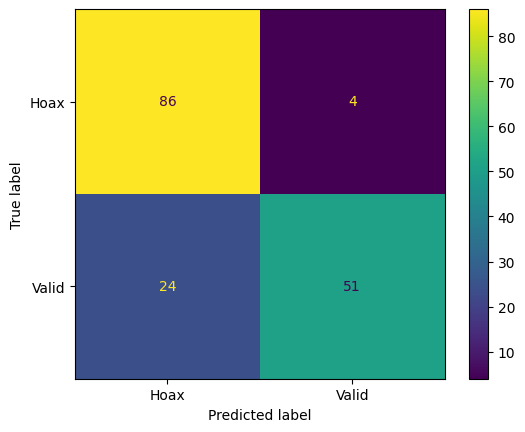

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
unique_labels = np.unique(df_test['tagging'])
ConfusionMatrixDisplay.from_predictions(df_test['ClassLabel'], df_test['tagging_predictions'], display_labels=unique_labels)
plt.show()